<a href="https://colab.research.google.com/github/helosantosdesousa/Projeto-Final-Bootcamp-Dados/blob/main/Projeto_final_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e Previsão de Rotatividade de Funcionários com Machine Learning** 👩‍💻
Este projeto, desenvolvido como trabalho final do Bootcamp de Cientista de Dados da Data Girls, teve como objetivo analisar e modelar os fatores que influenciam a rotatividade de funcionários (Attrition) em um conjunto de dados de Recursos Humanos. O dataset utilizado foi o ['IBM HR Analytics Attrition'](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

O trabalho iniciou-se com uma análise exploratória para identificar padrões, avaliar a qualidade dos dados e compreender as características dos colaboradores. Em seguida, foram aplicadas etapas de limpeza e pré-processamento, incluindo tratamento de outliers, conversão de tipos, padronização de variáveis numéricas e codificação de variáveis categóricas, preparando o conjunto de dados para a modelagem preditiva.

Na etapa de modelagem, foram implementados e otimizados dois modelos de classificação — Support Vector Classifier (SVC) e Random Forest Classifier. Técnicas de otimização de hiperparâmetros (Grid Search, Randomized Search e Bayesian Optimization) e validação cruzada (K-Fold, Stratified K-Fold, Repeated K-Fold e Leave-One-Out) garantiram uma avaliação robusta da performance dos modelos.

Por fim, foi demonstrado como utilizar os modelos treinados para prever a saída de funcionários a partir de novos dados, além de salvar os modelos e o scaler para uso futuro em aplicações reais.

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Lendo os dados

In [2]:
df_employee = pd.read_csv('RH-DATASET.csv')

In [3]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_employee.shape

(1470, 35)

In [5]:
df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Listar os valores mínimos e máximos das colunas numéricas

In [7]:
colunas_numericas = df_employee.select_dtypes(include='number').columns

min_max_values = {
    col: {'min': df_employee[col].min(), 'max': df_employee[col].max()}
    for col in colunas_numericas
}

for col, values in min_max_values.items():
    print(f"{col}: Mínimo = {values['min']}, Máximo = {values['max']}")


Age: Mínimo = 18, Máximo = 60
DailyRate: Mínimo = 102, Máximo = 1499
DistanceFromHome: Mínimo = 1, Máximo = 29
Education: Mínimo = 1, Máximo = 5
EmployeeCount: Mínimo = 1, Máximo = 1
EmployeeNumber: Mínimo = 1, Máximo = 2068
EnvironmentSatisfaction: Mínimo = 1, Máximo = 4
HourlyRate: Mínimo = 30, Máximo = 100
JobInvolvement: Mínimo = 1, Máximo = 4
JobLevel: Mínimo = 1, Máximo = 5
JobSatisfaction: Mínimo = 1, Máximo = 4
MonthlyIncome: Mínimo = 1009, Máximo = 19999
MonthlyRate: Mínimo = 2094, Máximo = 26999
NumCompaniesWorked: Mínimo = 0, Máximo = 9
PercentSalaryHike: Mínimo = 11, Máximo = 25
PerformanceRating: Mínimo = 3, Máximo = 4
RelationshipSatisfaction: Mínimo = 1, Máximo = 4
StandardHours: Mínimo = 80, Máximo = 80
StockOptionLevel: Mínimo = 0, Máximo = 3
TotalWorkingYears: Mínimo = 0, Máximo = 40
TrainingTimesLastYear: Mínimo = 0, Máximo = 6
WorkLifeBalance: Mínimo = 1, Máximo = 4
YearsAtCompany: Mínimo = 0, Máximo = 40
YearsInCurrentRole: Mínimo = 0, Máximo = 18
YearsSinceLastPro

Listar as categorias não numéricas

In [8]:
colunas_obj = df_employee.select_dtypes(include='object').columns

for col in colunas_obj:
    if col in df_employee.columns:
        print(f"Categorias em '{col}':")
        print(df_employee[col].unique())
        print("-" * 20)



Categorias em 'Attrition':
['Yes' 'No']
--------------------
Categorias em 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------
Categorias em 'Department':
['Sales' 'Research & Development' 'Human Resources']
--------------------
Categorias em 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------
Categorias em 'Gender':
['Female' 'Male']
--------------------
Categorias em 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
--------------------
Categorias em 'MaritalStatus':
['Single' 'Married' 'Divorced']
--------------------
Categorias em 'Over18':
['Y']
--------------------
Categorias em 'OverTime':
['Yes' 'No']
--------------------


# Dicionário de dados

| Nome da coluna | Tipo     | Descrição | Categorias (se aplicável) |
|----------------|----------|-----------|--------|
| Age            | Inteiro    | Idade do funcionário           |
| Attrition      | Booleano  | Indica o status do vínculo da empresa           |
| BusinessTravel | Categoria   | Frequência de viagens a trabalho            | Travel Frequently, Rarely Travel, Non-Travel
| DailyRate      | Inteiro    | Remuneração por dia           |
| Department     | Categoria   | Departamento ao qual o funcionário está alocado          | Sales,Research & Development, Human Resources
| DistanceFromHome | Inteiro  | Distância de casa até o trabalho           |
| Education      | Categoria    | Indicador de nível de escolaridade           | De 1 (menor) à 5 (maior)
| EducationField | Categoria   | Campo de estudo do funcionário           |Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources
| EmployeeCount  | Inteiro    | Coluna auxiliar para facilitar a soma de registros (cada funcionário = 1)          |
| EmployeeNumber | Inteiro    | Identificador único para cada funcionário no sistema          |
| EnvironmentSatisfaction | Categoria | Indicador de nível de satisfação do colaborador em relação ao ambiente de trabalho           | De 1 (menor) à 4 (maior)
| Gender         | Categoria   | Identidade de gênero do funcionário        | Female, Male
| HourlyRate     | Inteiro    | Valor de hora de trabalho          |
| JobInvolvement | Categoria    | Indicador de nível de envolvimento e dedicação do colaborador ao trabalho           | De 1 (menor) à 4 (maior)
| JobLevel       | Categoria    | Categorias de 1 à 5 para o nível de senioridade do funcionário           |
| JobRole        | Categoria   | Função exercida pelo funcionário          | Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager,Sales Representative, Research Director, Human Resources
| JobSatisfaction | Categoria   | Indicador de Nível de satisfação do trabalho           | De 1(menor) à 4 (maior)
| MaritalStatus  | Categorias  | Estado civil do funcionário           | Single, Married, Divorced
| MonthlyIncome  | Inteiro    | Renda mensal bruta do funcionário          |
| MonthlyRate    | Inteiro    | Remuneração mensal do funcionário (salário + benefícios)           |
| NumCompaniesWorked | Inteiro | Quantidade de empresas em que o funcionário já trabalhou          |
| Over18         | Booleano   | Indica se o funcionário tem 18 anos ou mais           |
| OverTime       | Booleano   | Indica se o funcionário está autorizado a realizar horas extras           |
| PercentSalaryHike | Inteiro | Número inteiro com o percentual do aumento de salário           |
| PerformanceRating | Categoria | Indica a avaliação de performance           | De 1 (menor) à 4 (maior)
| RelationshipSatisfaction | Categoria | Indicador de nível de satisfação do colaborador em relação às interações no ambiente de trabalho.           | De 1 (menor) à 4 (maior)
| StandardHours  | Inteiro    | Quantidade de horas de trabalho previstas            |
| StockOptionLevel | Categoria  | Indicador de nível de benefício relacionado a opções de compra de ações da empresa que o funcionário recebe como parte do pacote de compensação         | De 0 (menor) à 4 (maior)
| TotalWorkingYears | Inteiro | Total de anos de trabalho           |
| TrainingTimesLastYear | Inteiro | Total de horas em treinamento no último ano           |
| WorkLifeBalance | Categoria   | Indica a qualidade de equilíbrio entre vida e trabalho           | De 1 (menor) à 4 (maior)
| YearsAtCompany | Inteiro    | Anos trabalhados na empresa           |
| YearsInCurrentRole | Inteiro | Anos de trabalho no cargo atual         |
| YearsSinceLastPromotion | Inteiro | Quantidade de anos que se passaram desde a última promoção           |
| YearsWithCurrManager | Inteiro | Quantidade de anos trabalhados com o gerente atual           |

# Limpeza de dados

## Pré-processamento de dados
1. Verificação de valores nulos e tratamento de dados faltantes
2. Conversão de tipos
3. Remoção de duplicatas
4. Tratar outliers
5. Normalização e padronização



### **1**. Verificação de valores nulos e tratamento de dados faltantes
Verificar se tem algum valor nulo no dataset e tratar ele (seja deletando ou usando media/mediana/moda)

In [9]:
missing_values = pd.DataFrame({'coluna': df_employee.columns,
                               'tipo': df_employee.dtypes,
                               'valores faltantes': df_employee.isna().sum(),
                               '% de valores faltantes': (df_employee.isna().sum()/df_employee.shape[0])*100,
                               'qtd de valores únicos por coluna': df_employee.nunique()})

display(missing_values)

,coluna,tipo,valores faltantes,% de valores faltantes,qtd de valores únicos por coluna
Age,Age,int64,0,0.0,43
Attrition,Attrition,object,0,0.0,2
BusinessTravel,BusinessTravel,object,0,0.0,3
DailyRate,DailyRate,int64,0,0.0,886
Department,Department,object,0,0.0,3
DistanceFromHome,DistanceFromHome,int64,0,0.0,29
Education,Education,int64,0,0.0,5
EducationField,EducationField,object,0,0.0,6
EmployeeCount,EmployeeCount,int64,0,0.0,1
EmployeeNumber,EmployeeNumber,int64,0,0.0,1470


Não há valores faltantes no dataset

### **2.** Conversão de tipos
Verificar se há algum tipo de dado errado no dataset e converter para o correto

In [10]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Procurando colunas com valores ```Yes``` ou ```No``` ou ```Y``` ou ```N```

In [11]:
[col for col in df_employee.columns
               if 'Yes' in df_employee[col].astype(str).unique() or 'Y' in df_employee[col].astype(str).unique() or 'No' in df_employee[col].astype(str).unique() or 'N' in df_employee[col].astype(str).unique()]


['Attrition', 'Over18', 'OverTime']

As colunas **`Over18`**, **`Attrition`** e **`OverTime`** apresentavam valores categóricos como `'Y'`, `'N'`, `'Yes'` e `'No'`. Para facilitar a análise e a construção de modelos, os valores dessas colunas foram convertidos para booleanos, da seguinte forma:

- `'Y'` ou `'Yes'` → `True`
- `'N'` ou `'No'` → `False`

In [12]:
df_employee['Over18'] = df_employee['Over18'].replace({'Y':True, 'N':False})
df_employee['Attrition'] = df_employee['Attrition'].replace({'Yes':True, 'No':False})
df_employee['OverTime'] = df_employee['OverTime'].replace({'Yes':True, 'No':False})

/tmp/ipython-input-2989010124.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_employee['Over18'] = df_employee['Over18'].replace({'Y':True, 'N':False})
/tmp/ipython-input-2989010124.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_employee['Attrition'] = df_employee['Attrition'].replace({'Yes':True, 'No':False})
/tmp/ipython-input-2989010124.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [13]:
df_employee['Over18'].unique()
df_employee['Attrition'].unique()
df_employee['OverTime'].unique()

array([ True, False])

Ao comparar os tipos de dados das colunas com os significados dos seus respectivos nomes, verificou-se que não há necessidade de conversões adicionais. Entretanto, as colunas ```Over18```, ```Attrition``` e ```OverTime```, que indicam, respectivamente, se o funcionário é maior de idade, se houve desligamento e se realiza horas extras, apresentavam valores como 'Y' e 'N'. Esses valores foram convertidos para True e False, respectivamente, para facilitar a interpretação e a análise dos dados.

### **3.** Remoção de duplicatas
Verificar se tem dados duplicados e removê-los do dataset

In [14]:
df_employee[df_employee.duplicated(subset=['EmployeeNumber'], keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Para verificar a presença de dados duplicados, analisei se o identificador único de cada funcionário ```EmployeeNumber``` aparecia mais de uma vez no dataset. Como não foram encontradas repetições, conclui-se que não há registros duplicados.

### **4.** Tratar outliers
Verificar a presença de dados muito distantes da maioria

####Boxplot



É um gráfico que resume a distribuição de um conjunto de dados numéricos de forma resumida.

A caixa representa o IQR (Intervalo Interquartil), calculado como ```Q3 - Q1```, a distância entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

O Q1 é o valor **abaixo** do qual estão **25%** dos dados, enquanto o Q3 (terceiro quartil) representa o ponto **abaixo** do qual estão **75%** dos dados. (Onde restam os 75% maiores)

As linhas horizontais que se estendem da caixa, os whiskers ("bigodes"), indicam os limites inferiores e superiores dos dados considerados normais.

Os pontos fora dos whiskers são considerados outliers, ou seja, valores extremos que se distanciam significativamente da tendência geral dos dados.


In [15]:
df_employee.select_dtypes(include='number')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


#### Verificação dos gráficos


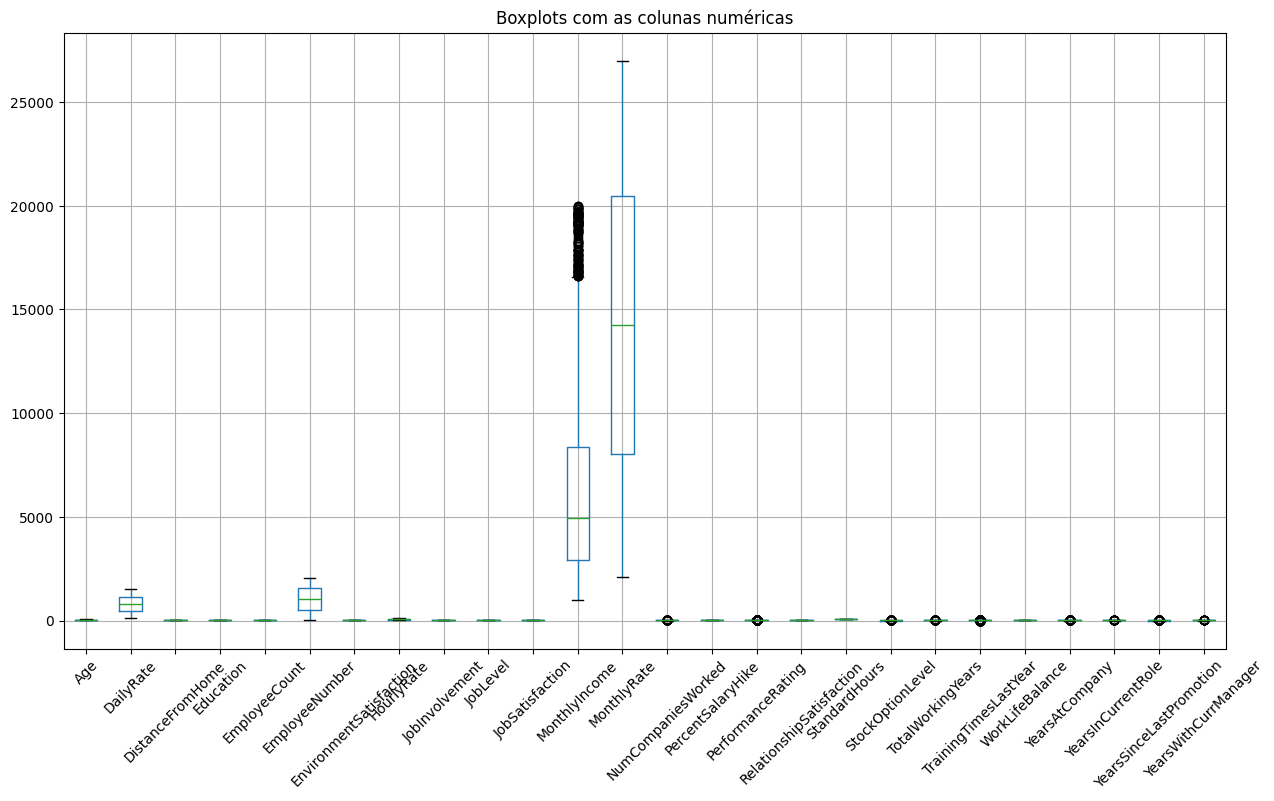

In [16]:
colunas_numericas = df_employee.select_dtypes(include='number').columns

plt.figure(figsize=(15, 8))
df_employee[colunas_numericas].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots com as colunas numéricas")
plt.show()

In [17]:
def colunas_com_outliers(df):
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_outliers = []

    for col in colunas_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        if df[(df[col] < limite_inferior) | (df[col] > limite_superior)].any(axis=None):
            colunas_outliers.append(col)

    return colunas_outliers

colunas_com_outliers_encontradas = colunas_com_outliers(df_employee)
print("Colunas com outliers:", colunas_com_outliers_encontradas)


Colunas com outliers: ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Com base na análise visual dos gráficos, identificamos que algumas colunas apresentam outliers. Para facilitar o tratamento desses dados, utilizamos um código que lista os nomes dessas colunas antes de aplicarmos qualquer ajuste.

#### Tratando as colunas com outliers

##### Processo de capping
Aplicamos capping nas colunas numéricas que possuem outliers detectados previamente. O objetivo é reduzir o impacto dos valores extremos, sem removê-los totalmente do conjunto de dados, para preservar o máximo de informações possível. Ao invés de excluir os valores extremos, substituímos os outliers pelos limites inferior e superior aceitáveis.

In [18]:
colunas_para_tratar = colunas_com_outliers_encontradas.copy()

df_tratado_capping = df_employee.copy()
print('Aplicando capping nas colunas com outliers:')

for coluna in colunas_para_tratar:
    if coluna in df_tratado_capping.columns and df_tratado_capping[coluna].dtype in ['int64', 'float64']:
        Q1 = df_tratado_capping[coluna].quantile(0.25)
        Q3 = df_tratado_capping[coluna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        df_tratado_capping[coluna] = df_tratado_capping[coluna].clip(lower=limite_inferior, upper=limite_superior)
        print(f'- Capping aplicado na coluna: {coluna}')
    else:
        print(f"- Coluna '{coluna}' não encontrada")

print('\nProcesso de capping concluído.')

Aplicando capping nas colunas com outliers:
- Capping aplicado na coluna: MonthlyIncome
- Capping aplicado na coluna: NumCompaniesWorked
- Capping aplicado na coluna: PerformanceRating
- Capping aplicado na coluna: StockOptionLevel
- Capping aplicado na coluna: TotalWorkingYears
- Capping aplicado na coluna: TrainingTimesLastYear
- Capping aplicado na coluna: YearsAtCompany
- Capping aplicado na coluna: YearsInCurrentRole
- Capping aplicado na coluna: YearsSinceLastPromotion
- Capping aplicado na coluna: YearsWithCurrManager

Processo de capping concluído.


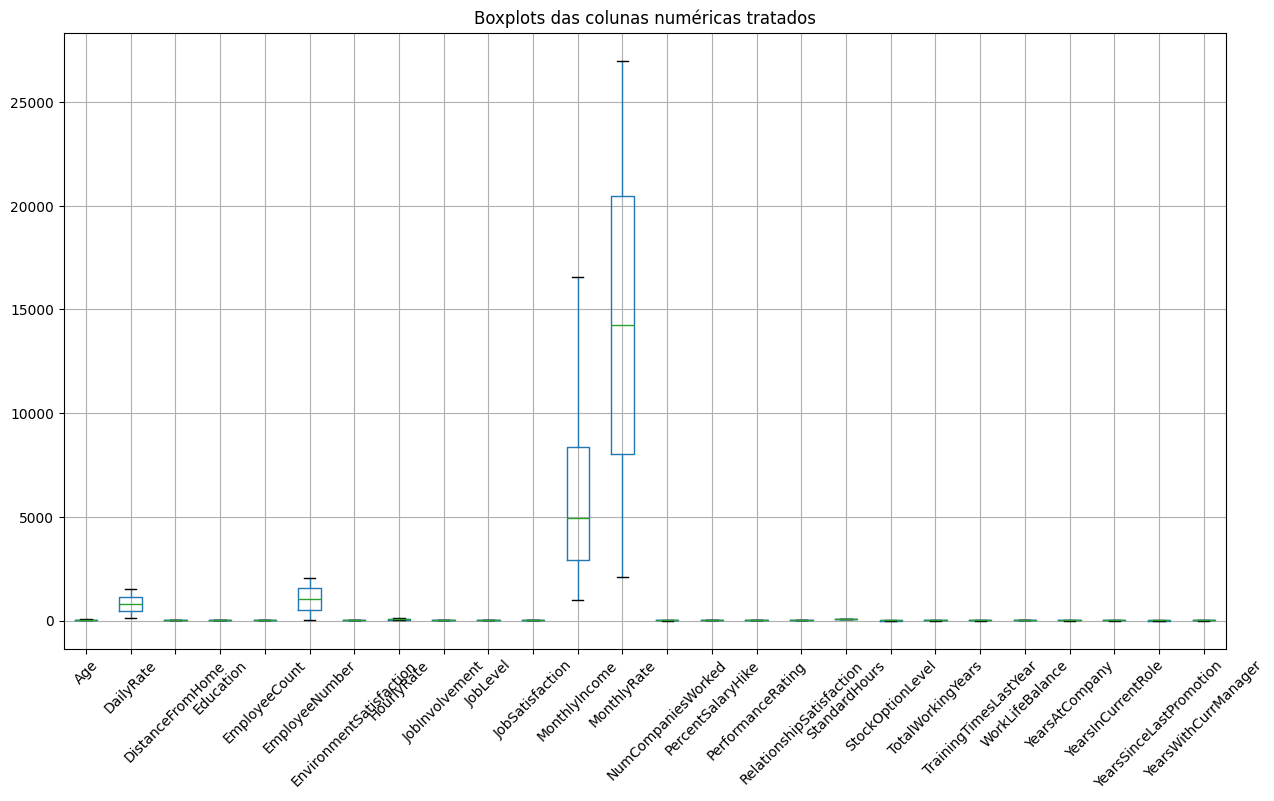

In [19]:
colunas_numericas_capping = df_tratado_capping.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
df_tratado_capping[colunas_numericas_capping].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots das colunas numéricas tratados')
plt.show()

### **5.** Normalização e padronização

A padronização transforma as colunas numéricas do dataset para que tenham média 0 e desvio padrão 1, usando o StandardScaler do scikit-learn. Isso é importante porque muitos algoritmos de machine learning são sensíveis à escala dos dados, e variáveis em escalas diferentes podem distorcer o aprendizado. Com a padronização, todas as colunas numéricas passam a contribuir de forma equilibrada para o modelo, melhorando seu desempenho.

In [20]:
colunas_numericas_capping = df_tratado_capping.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# aplica fit_transform nas colunas numéricas
df_padronizado = scaler.fit_transform(df_tratado_capping[colunas_numericas_capping])

df_padronizado = pd.DataFrame(df_padronizado, columns=colunas_numericas_capping, index=df_tratado_capping.index)

print('Primeiras linhas do df apos padronização:')
display(df_padronizado.head())

Primeiras linhas do df apos padronização:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,-1.584178,0.0,-0.978160,-0.424999,-2.130765,-2.493820,-0.123832,-0.058474,-0.776139,0.253823
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,1.191438,0.0,0.300537,-0.151076,0.278639,0.338096,0.678078,0.785616,-0.372486,0.822605
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,-0.658973,0.0,-0.978160,-0.561960,0.278639,0.338096,-1.326697,-1.183926,-0.776139,-1.168130
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0.266233,0.0,-0.978160,-0.424999,0.278639,0.338096,0.277123,0.785616,0.434819,-1.168130
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1.191438,0.0,0.300537,-0.698921,0.278639,0.338096,-0.925742,-0.621200,0.031166,-0.599348


#### Encoding
Transformar colunas categóricas (strings e booleanos) em valores numéricos para que o df esteja pronto para ser usado no nosso modelo de ML, que não aceita dados do tipo object (strings) ou bool diretamente.

In [21]:
colunas_categoricas = df_tratado_capping.select_dtypes(include=['object', 'bool']).columns

# colunas que usam one-hot encoding (variáveis sem ordem)
colunas_para_onehot = df_tratado_capping[colunas_categoricas].select_dtypes(include='object').columns

df_categorico_encoded = pd.get_dummies(df_tratado_capping[colunas_para_onehot], drop_first=True, dtype=int)

colunas_booleanas = df_tratado_capping[colunas_categoricas].select_dtypes(include='bool').columns
df_booleanas = df_tratado_capping[colunas_booleanas].astype(int)

df_padronizado = pd.concat([df_padronizado, df_categorico_encoded, df_booleanas], axis=1)


print('\nPrimeiras linhas do DataFrame final')
df_padronizado.head()



Primeiras linhas do DataFrame final


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition,Over18,OverTime
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,0,1,0,0,1,1,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,0,1,0,0,1,0,0,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,0,0,0,0,0,0,1,1,1,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,0,1,0,0,1,0,0,1,1
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,0,0,0,0,0,1,0,0,1,0


# Análise exploratória de dados (EDA)

Utilizamos o dataset antes da padronização para a etapa de análise exploratória, já que os valores originais tornam a interpretação dos dados mais intuitiva.

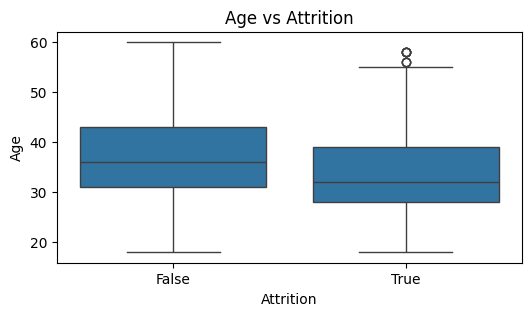

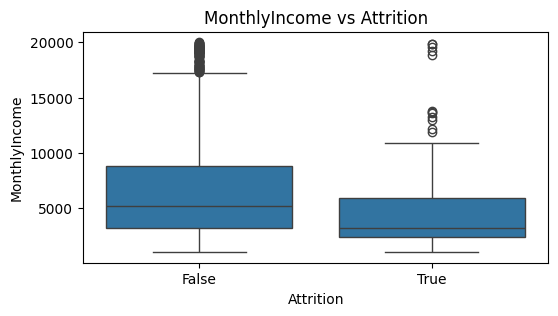

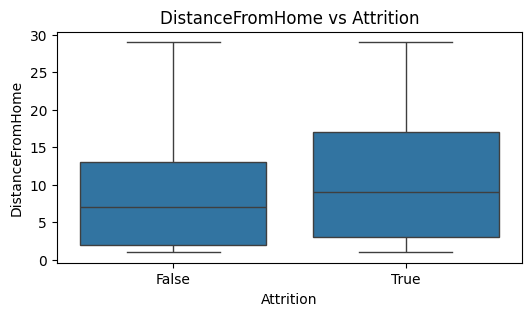

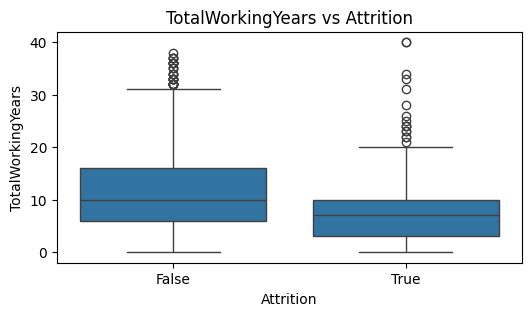

In [22]:
num_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Attrition', y=col, data=df_employee)
    plt.title(f'{col} vs Attrition')

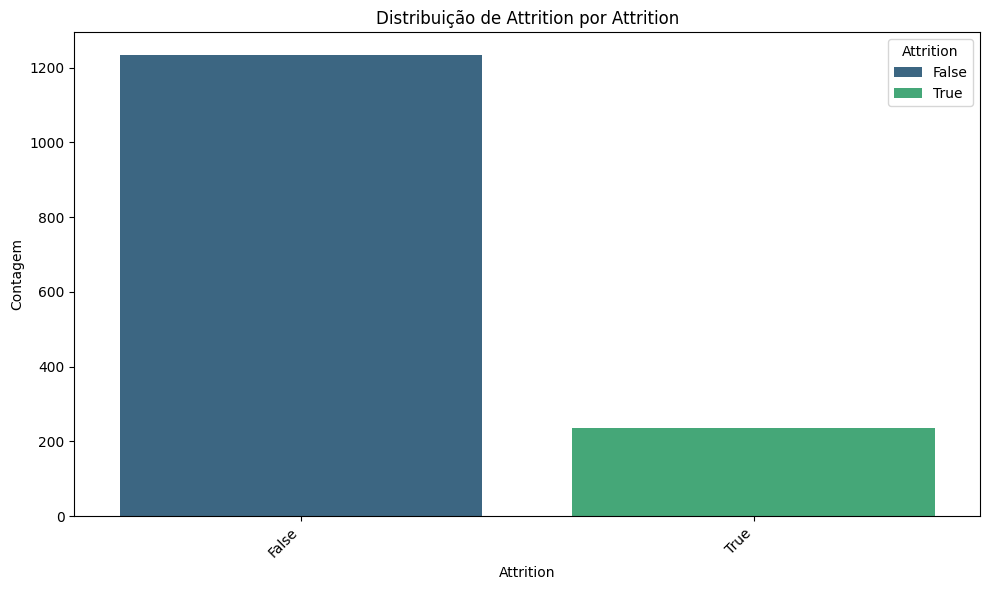

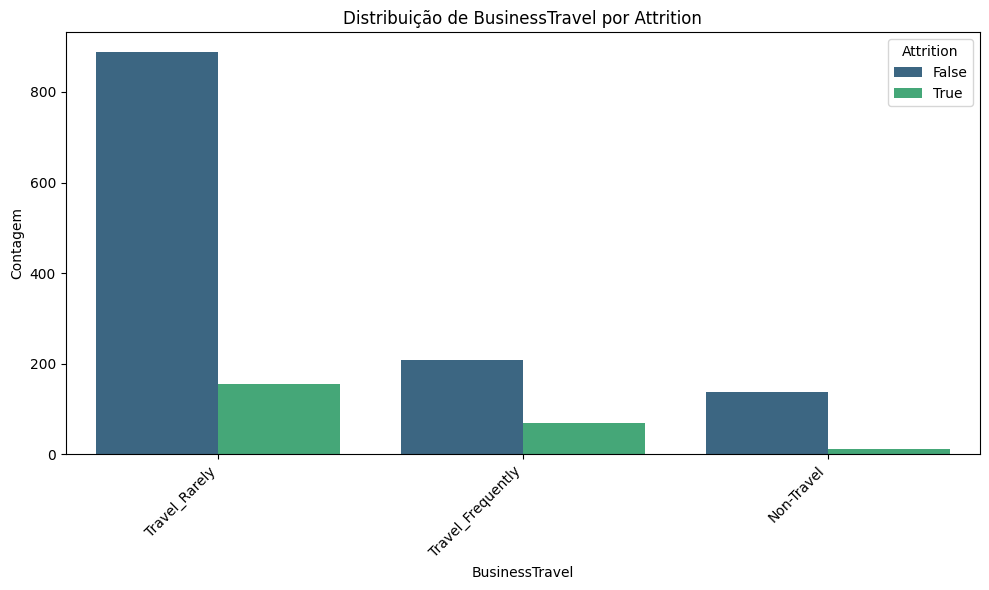

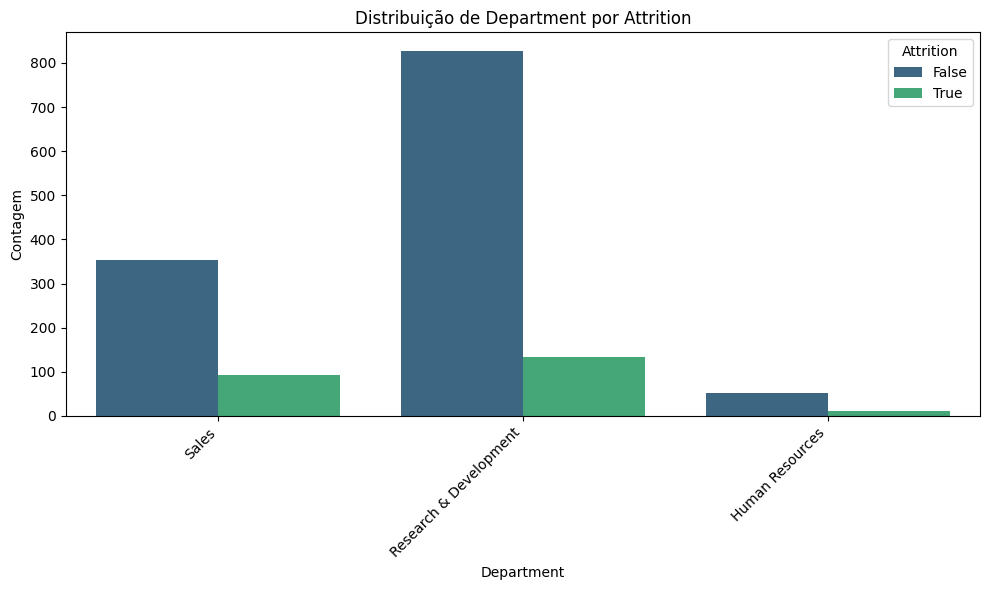

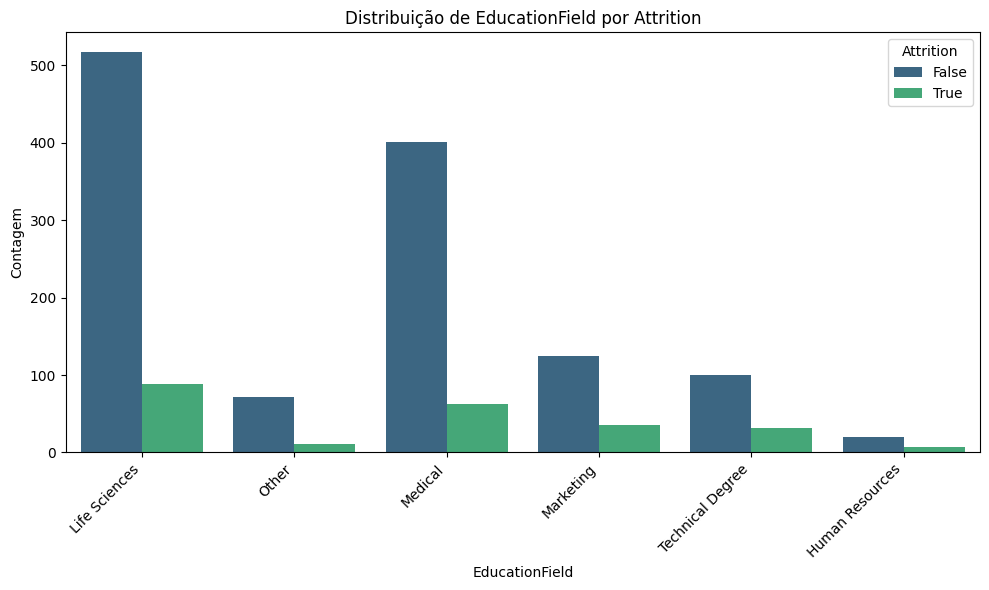

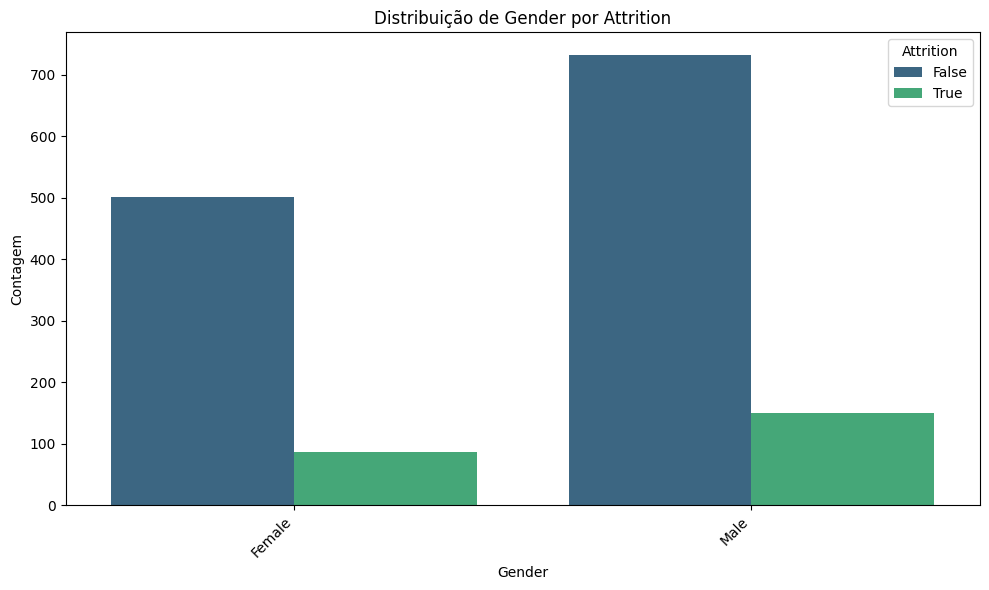

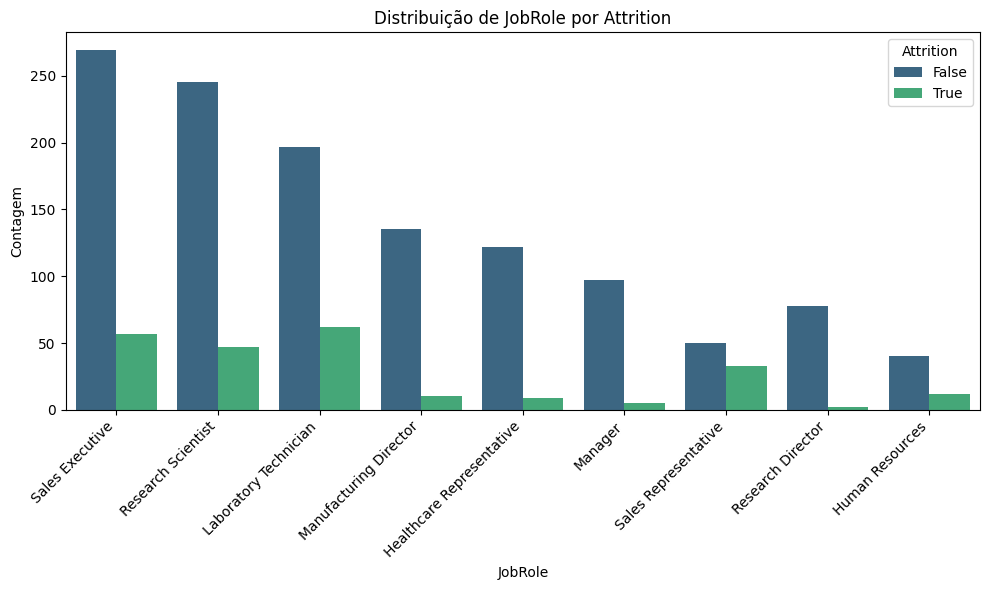

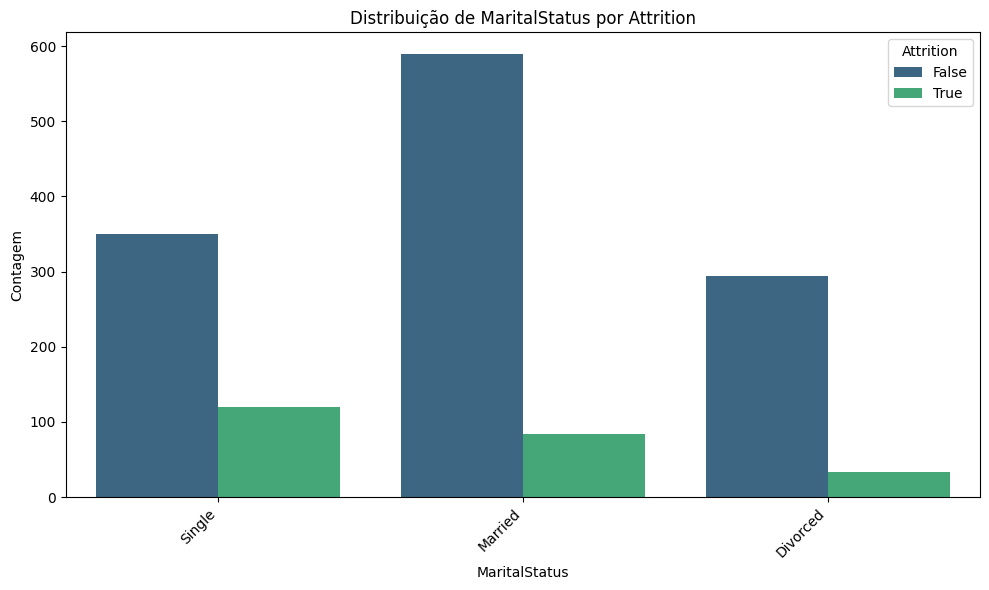

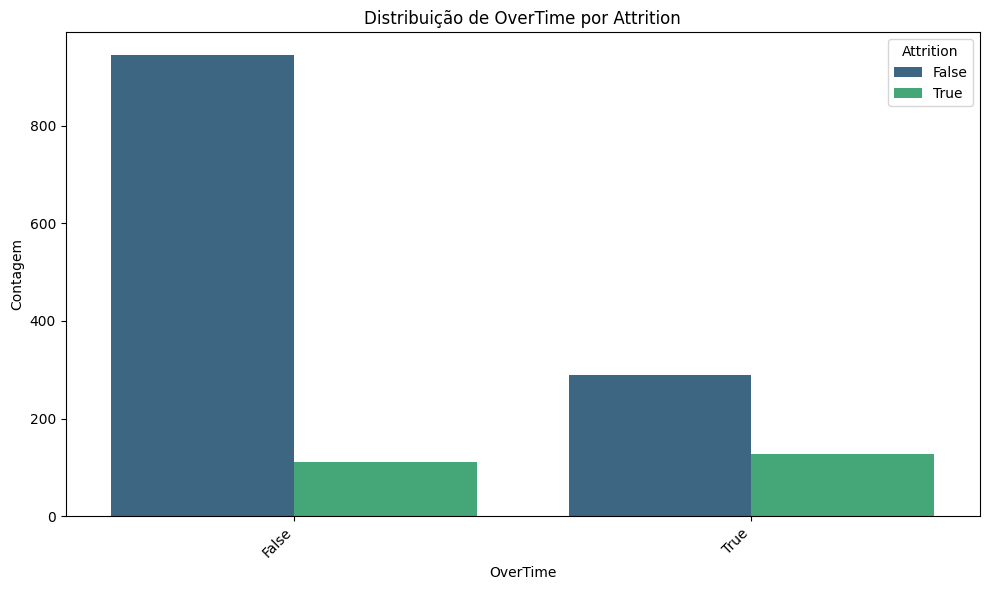

In [23]:
colunas_categoricas = df_employee.select_dtypes(include=['object', 'bool']).columns
colunas_categoricas = colunas_categoricas.drop(['EmployeeCount', 'StandardHours', 'Over18'], errors='ignore')


for coluna in colunas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_employee, x=coluna, hue='Attrition', palette='viridis')
    plt.title(f'Distribuição de {coluna} por Attrition')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [24]:
contagem = df_employee['Attrition'].value_counts()
total = contagem.sum()

attrition_perc = (contagem/ total) * 100

print('Percentual de rotatividade dos funcionários: ')
print(attrition_perc.apply(lambda x: f'{x:.2f}%'))

Percentual de rotatividade dos funcionários: 
Attrition
False    83.88%
True     16.12%
Name: count, dtype: object


In [25]:
# contagem dos funcionários por categoria de BusinessTravel
contagem_viagem = df_employee['BusinessTravel'].value_counts()
total_funcionarios = contagem_viagem.sum()

percentual_viagem = (contagem_viagem / total_funcionarios) * 100

print('Percentual de funcionários por categoria de Business Travel:')
print(percentual_viagem.apply(lambda x: f'{x:.2f}%'))

print('\nTaxa de Attrition dentro de cada categoria de Business Travel:')

tabela_viagem_attrition = pd.crosstab(df_employee['BusinessTravel'],
                                      df_employee['Attrition'],
                                      normalize='index') * 100

display(tabela_viagem_attrition[True].map('{:.2f}%'.format).to_frame())


Percentual de funcionários por categoria de Business Travel:
BusinessTravel
Travel_Rarely        70.95%
Travel_Frequently    18.84%
Non-Travel           10.20%
Name: count, dtype: object

Taxa de Attrition dentro de cada categoria de Business Travel:


,True
BusinessTravel,
Non-Travel,8.00%
Travel_Frequently,24.91%
Travel_Rarely,14.96%


In [26]:
tabela_viagem_estado_civil = pd.crosstab(
    [df_employee['BusinessTravel'], df_employee['MaritalStatus']],
    df_employee['Attrition'],
    normalize='index') * 100

display(tabela_viagem_estado_civil[True].map('{:.2f}%'.format))


BusinessTravel     MaritalStatus
Non-Travel         Divorced          2.27%
                   Married           5.08%
                   Single           17.02%
Travel_Frequently  Divorced         20.63%
                   Married          16.10%
                   Single           38.54%
Travel_Rarely      Divorced          8.64%
                   Married          12.50%
                   Single           22.94%
Name: True, dtype: object

In [27]:
tabela_viagem_overtime = pd.crosstab(
    [df_employee['BusinessTravel'], df_employee['OverTime']],
    df_employee['Attrition'],
    normalize='index') * 100

display(tabela_viagem_overtime[True].map('{:.2f}%'.format))


BusinessTravel     OverTime
Non-Travel         False        4.35%
                   True        20.00%
Travel_Frequently  False       17.28%
                   True        41.86%
Travel_Rarely      False        9.63%
                   True        28.47%
Name: True, dtype: object

In [28]:
print('Análise de Business Travel, Estado Civil e Attrition:')
print(tabela_viagem_estado_civil.apply(lambda x: x.map('{:.2f}%'.format)))

print('\nAnálise de Business Travel, OverTime e Attrition:')
print(tabela_viagem_overtime.apply(lambda x: x.map('{:.2f}%'.format)))

Análise de Business Travel, Estado Civil e Attrition:
Attrition                         False   True 
BusinessTravel    MaritalStatus                
Non-Travel        Divorced       97.73%   2.27%
                  Married        94.92%   5.08%
                  Single         82.98%  17.02%
Travel_Frequently Divorced       79.37%  20.63%
                  Married        83.90%  16.10%
                  Single         61.46%  38.54%
Travel_Rarely     Divorced       91.36%   8.64%
                  Married        87.50%  12.50%
                  Single         77.06%  22.94%

Análise de Business Travel, OverTime e Attrition:
Attrition                    False   True 
BusinessTravel    OverTime                
Non-Travel        False     95.65%   4.35%
                  True      80.00%  20.00%
Travel_Frequently False     82.72%  17.28%
                  True      58.14%  41.86%
Travel_Rarely     False     90.37%   9.63%
                  True      71.53%  28.47%


In [73]:
df_sairam = df_employee[df_employee['Attrition'] == True]

saidas_por_faixa_etaria = df_sairam['AgeGroup'].value_counts()

total_sairam = df_sairam.shape[0]

percentual_18_24 = (saidas_por_faixa_etaria.get('18-24', 0) / total_sairam) * 100
percentual_25_34 = (saidas_por_faixa_etaria.get('25-34', 0) / total_sairam) * 100

print(f'Percentual de funcionários que saíram com idade entre 18-24 anos: {percentual_18_24:.2f}%')
print(f'Percentual de funcionários que saíram com idade entre 25-34 anos: {percentual_25_34:.2f}%')

print('\nDistribuição de funcionários que saíram por faixa etária:')
saidas_por_faixa_etaria_percentual = (saidas_por_faixa_etaria / total_sairam) * 100
display(saidas_por_faixa_etaria_percentual.apply(lambda x: f'{x:.2f}%').to_frame())


Percentual de funcionários que saíram com idade entre 18-24 anos: 16.03%
Percentual de funcionários que saíram com idade entre 25-34 anos: 47.26%

Distribuição de funcionários que saíram por faixa etária:


,count
AgeGroup,
25-34,47.26%
35-44,21.52%
18-24,16.03%
45-54,10.55%
55-64,4.64%


In [74]:
total_funcionarios = df_employee.shape[0]

contagem_satisfacao = df_employee['EnvironmentSatisfaction'].value_counts().sort_index()

percentual_satisfacao = (contagem_satisfacao / total_funcionarios) * 100

tabela_satisfacao = pd.DataFrame({
    'Quantidade de Funcionários': contagem_satisfacao,
    'Percentual': percentual_satisfacao.map('{:.2f}%'.format)
})

print('Distribuição de funcionários por nível de EnvironmentSatisfaction:')
display(tabela_satisfacao)


Distribuição de funcionários por nível de EnvironmentSatisfaction:


,Quantidade de Funcionários,Percentual
EnvironmentSatisfaction,,
1,284,19.32%
2,287,19.52%
3,453,30.82%
4,446,30.34%


In [75]:
total_funcionarios = df_employee.shape[0]

contagem_satisfacao_trabalho = df_employee['JobSatisfaction'].value_counts().sort_index()

percentual_satisfacao_trabalho = (contagem_satisfacao_trabalho / total_funcionarios) * 100

tabela_satisfacao_trabalho = pd.DataFrame({
    'Quantidade de Funcionários': contagem_satisfacao_trabalho,
    'Percentual': percentual_satisfacao_trabalho.map('{:.2f}%'.format)
})

print('Distribuição de funcionários por nível de JobSatisfaction:')
display(tabela_satisfacao_trabalho)


Distribuição de funcionários por nível de JobSatisfaction:


,Quantidade de Funcionários,Percentual
JobSatisfaction,,
1,289,19.66%
2,280,19.05%
3,442,30.07%
4,459,31.22%


In [76]:
total_funcionarios = df_employee.shape[0]

contagem_equilibrio_vida_trabalho = df_employee['WorkLifeBalance'].value_counts().sort_index()

percentual_equilibrio_vida_trabalho = (contagem_equilibrio_vida_trabalho / total_funcionarios) * 100

tabela_equilibrio_vida_trabalho = pd.DataFrame({
    'Quantidade de Funcionários': contagem_equilibrio_vida_trabalho,
    'Percentual': percentual_equilibrio_vida_trabalho.map('{:.2f}%'.format)
})

print('Distribuição de funcionários por nível de WorkLifeBalance:')
display(tabela_equilibrio_vida_trabalho)


Distribuição de funcionários por nível de WorkLifeBalance:


,Quantidade de Funcionários,Percentual
WorkLifeBalance,,
1,80,5.44%
2,344,23.40%
3,893,60.75%
4,153,10.41%


In [77]:
total_funcionarios = df_employee.shape[0]

contagem_satisfacao_relacionamento = df_employee['RelationshipSatisfaction'].value_counts().sort_index()

percentual_satisfacao_relacionamento = (contagem_satisfacao_relacionamento / total_funcionarios) * 100

tabela_satisfacao_relacionamento = pd.DataFrame({
    'Quantidade de Funcionários': contagem_satisfacao_relacionamento,
    'Percentual': percentual_satisfacao_relacionamento.map('{:.2f}%'.format)
})

print('Distribuição de funcionários por nível de RelationshipSatisfaction:')
display(tabela_satisfacao_relacionamento)


Distribuição de funcionários por nível de RelationshipSatisfaction:


,Quantidade de Funcionários,Percentual
RelationshipSatisfaction,,
1,276,18.78%
2,303,20.61%
3,459,31.22%
4,432,29.39%


Distribuição de funcionários por StockOptionLevel (Percentual do Total):


,Quantidade de Funcionários,Percentual do Total
StockOptionLevel,,
0,631,42.93%
1,596,40.54%
2,158,10.75%
3,85,5.78%



Taxa de Attrition por StockOptionLevel (Percentual dentro de cada nível):


Attrition,False,True
StockOptionLevel,,
0,75.59%,24.41%
1,90.60%,9.40%
2,92.41%,7.59%
3,82.35%,17.65%


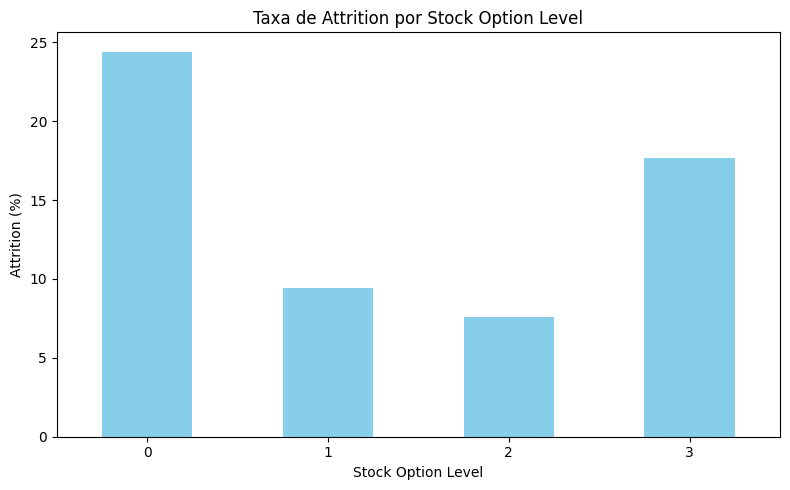

In [78]:
total_funcionarios = df_employee.shape[0]

contagem_opcoes_acao = df_employee['StockOptionLevel'].value_counts().sort_index()

percentual_opcoes_acao = (contagem_opcoes_acao / total_funcionarios) * 100

tabela_distribuicao_opcoes_acao = pd.DataFrame({
    'Quantidade de Funcionários': contagem_opcoes_acao,
    'Percentual do Total': percentual_opcoes_acao.map('{:.2f}%'.format)
})

print('Distribuição de funcionários por StockOptionLevel (Percentual do Total):')
display(tabela_distribuicao_opcoes_acao)

tabela_cruzada_attrition_opcoes_acao = pd.crosstab(
    df_employee['StockOptionLevel'],
    df_employee['Attrition'],
    normalize='index'
) * 100

print('\nTaxa de Attrition por StockOptionLevel (Percentual dentro de cada nível):')
display(tabela_cruzada_attrition_opcoes_acao.apply(lambda x: x.map('{:.2f}%'.format)))

tabela_cruzada_attrition_opcoes_acao[True].plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Taxa de Attrition por Stock Option Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Attrition (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Com base na tabela e no gráfico de barras que mostram a relação entre o nível de opções de ações (StockOptionLevel) e a rotatividade (Attrition), podemos observar que funcionários com nível 0 têm a maior taxa de rotatividade, de 24,41%. À medida que o nível de opções de ações aumenta para 1 e 2, a taxa de rotatividade cai significativamente para 9,40% e 7,59%, respectivamente, sugerindo que possuir algum nível de opções de ações está associado a uma menor probabilidade de deixar a empresa. No entanto, a taxa de rotatividade volta a subir para 17,65% entre os funcionários com nível 3, indicando que, embora opções de ações estejam ligadas a menor rotatividade, o nível mais alto não necessariamente corresponde à menor taxa de desligamento.


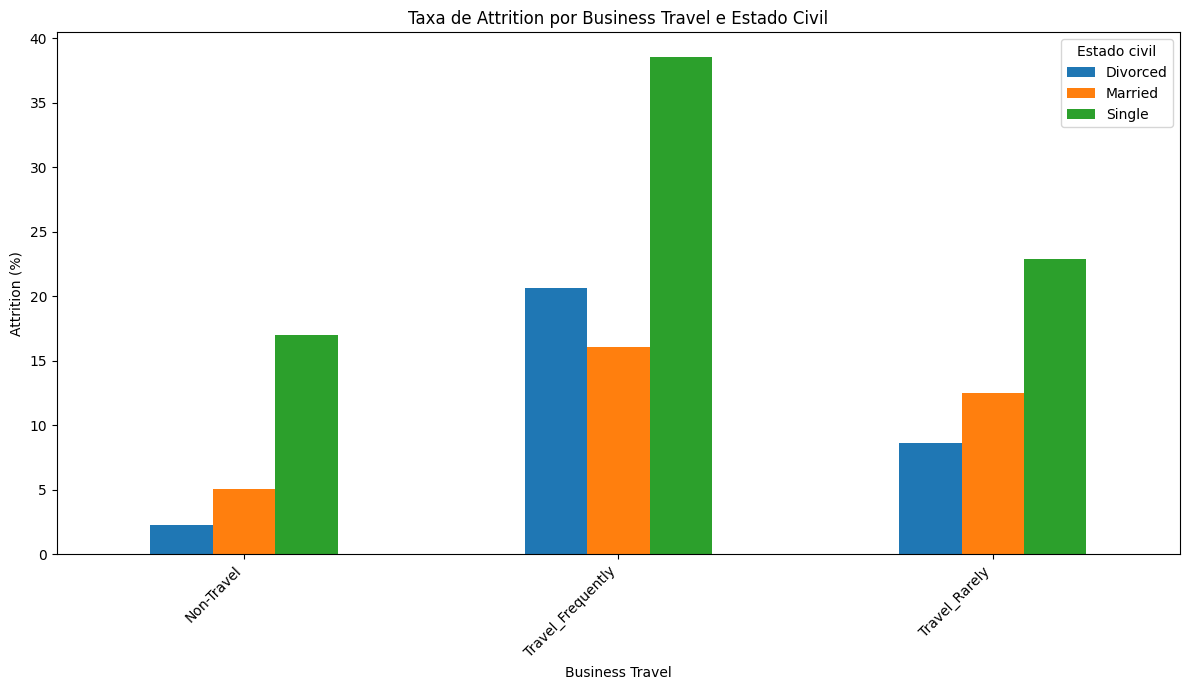

In [29]:
tabela_plot = tabela_viagem_estado_civil[True].unstack()

tabela_plot.plot(kind='bar', figsize=(12, 7))
plt.title('Taxa de Attrition por Business Travel e Estado Civil')
plt.xlabel('Business Travel')
plt.ylabel('Attrition (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado civil')
plt.tight_layout()

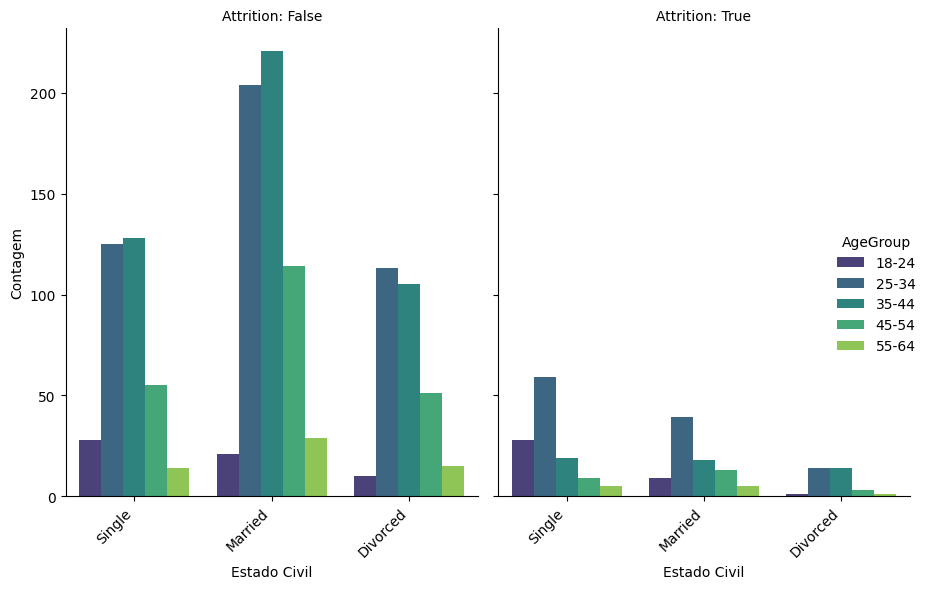

In [30]:
if 'AgeGroup' not in df_employee.columns:
    bins = [18, 25, 35, 45, 55, 65]
    labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
    df_employee['AgeGroup'] = pd.cut(df_employee['Age'], bins=bins, labels=labels, right=False)

g = sns.catplot(
    data=df_employee,
    x='MaritalStatus',
    hue='AgeGroup',
    col='Attrition',
    kind='count',
    palette='viridis',
    height=6,
    aspect=0.7
)

g.set_axis_labels('Estado Civil', 'Contagem')
g.set_titles('Attrition: {col_name}')
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()

## Visão geral
O dataset apresenta uma distribuição bastante desequilibrada, onde a maioria dos funcionários (aproximadamente 83,88%) permanece na empresa. Isso indica que, apesar de possíveis desafios, a maior parte dos colaboradores tem satisfação em seu ambiente de trabalho.

## Viagens a trabalho, estado civil e idade

### Viagens a trabalho
A maior parte dos funcionários (70,95%) realiza viagens a trabalho raramente. Contudo, o grupo que viaja com frequência, embora represente apenas 18,84% do total, apresenta a maior taxa de desligamento, de 24,91%. Por outro lado, os funcionários que não realizam viagens são os que menos deixam a empresa, indicando uma possível relação entre o deslocamento frequente e a rotatividade.

#### Estado civil e viagem a trabalho
Apesar do grupo de viajantes frequentes ser pequeno (cerca de 18%), ele concentra a maior proporção de solteiros e divorciados. Esse dado sugere que, especialmente para os divorciados, a rotina de viagens pode estar associada a insatisfação, possivelmente relacionada a desafios pessoais e profissionais.

### Tendência por faixa etária
Analisando as faixas etárias, observa-se que os colaboradores mais jovens (18-24 e 25-34 anos) apresentam maior tendência ao desligamento, enquanto as faixas mais maduras (45-54 e 55-64 anos) têm índices significativamente menores. Isso sugere que a idade é um fator importante na rotatividade, com os funcionários mais jovens sendo mais propensos a deixar a empresa.

## Satisfação no trabalho

### Ambiente de trabalho e rotatividade (attrition)
A maior parte dos funcionários que deixaram a empresa (25,35%) estavam insatisfeitos com o ambiente de trabalho. Em contraste, o grupo de colaboradores extremamente satisfeitos apresenta a menor taxa de rotatividade (13,45%), valor muito próximo ao observado no grupo “muito satisfeito” (13,69%). Esses dados indicam uma forte correlação entre a satisfação com o ambiente de trabalho e a permanência dos funcionários na empresa.

In [31]:
tabela_satisfacao_ambiente = pd.crosstab(
    df_employee['EnvironmentSatisfaction'],
    df_employee['Attrition'],
    normalize='index' ) * 100

print('Taxa de Attrition por nível de satisfação com o ambiente:')
display(tabela_satisfacao_ambiente[True].map('{:.2f}%'.format).to_frame())


Taxa de Attrition por nível de satisfação com o ambiente:


,True
EnvironmentSatisfaction,
1,25.35%
2,14.98%
3,13.69%
4,13.45%


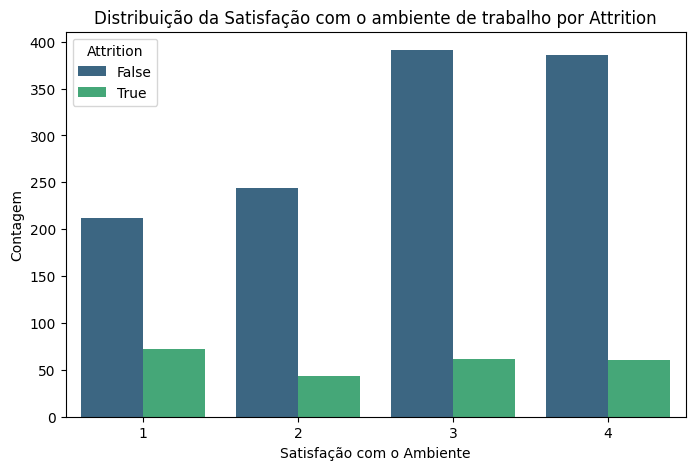

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_employee, x='EnvironmentSatisfaction', hue='Attrition', palette='viridis')
plt.title('Distribuição da Satisfação com o ambiente de trabalho por Attrition')
plt.xlabel('Satisfação com o Ambiente')
plt.ylabel('Contagem')
plt.legend(title='Attrition')

### Satisfação com o trabalho
O grupo com menor nível de satisfação (nível 1) apresentou a maior taxa de desligamento, com 22,84% de rotatividade. No entanto, o grupo com o segundo maior nível de satisfação (nível 3) também apresentou a segunda maior taxa de rotatividade, com pouco menos de 10 pontos percentuais de diferença em relação ao grupo 2, o que indica que essa variação ainda é significativa.

In [33]:
tabela_satisfacao_trabalho = pd.crosstab(
    df_employee['JobSatisfaction'],
    df_employee['Attrition'],
    normalize='index') * 100

print('Taxa de Attrition por nível de satisfação no trabalho:')
display(tabela_satisfacao_trabalho[True].map('{:.2f}%'.format).to_frame())


Taxa de Attrition por nível de satisfação no trabalho:


,True
JobSatisfaction,
1,22.84%
2,16.43%
3,16.52%
4,11.33%


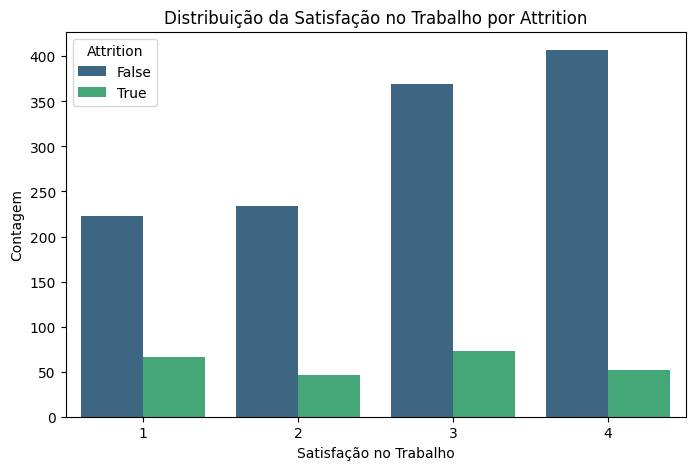

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_employee, x='JobSatisfaction', hue='Attrition', palette='viridis')
plt.title('Distribuição da Satisfação no Trabalho por Attrition')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Contagem')
plt.legend(title='Attrition')

### Avaliação de performance
Nenhum funcionário foi avaliado com performance inferior a 3. A diferença na taxa de rotatividade entre os grupos de performance 3 e 4 é de apenas 0,29%, sendo o grupo de performance 4 aquele com a maior rotatividade. A maior parte dos funcionários recebeu nota 3 em desempenho, porém isso não influencia significativamente a taxa de desligamento, já que mesmo os melhores avaliados apresentam taxas de saída superiores às dos grupos com avaliação menor.

In [35]:
contagem_performance = df_employee['PerformanceRating'].value_counts()
total_funcionarios = contagem_performance.sum()
percentual_performance = (contagem_performance / total_funcionarios) * 100

tabela_performance_attrition = pd.crosstab(
    df_employee['PerformanceRating'],
    df_employee['Attrition'],
    normalize='index' ) * 100

resumo_performance = pd.DataFrame({
    'Percentual de Funcionários': percentual_performance,
    'Taxa de Attrition (True)': tabela_performance_attrition[True]
})

display(resumo_performance.apply(lambda x: x.map('{:.2f}%'.format)))


,Percentual de Funcionários,Taxa de Attrition (True)
PerformanceRating,,
3,84.63%,16.08%
4,15.37%,16.37%


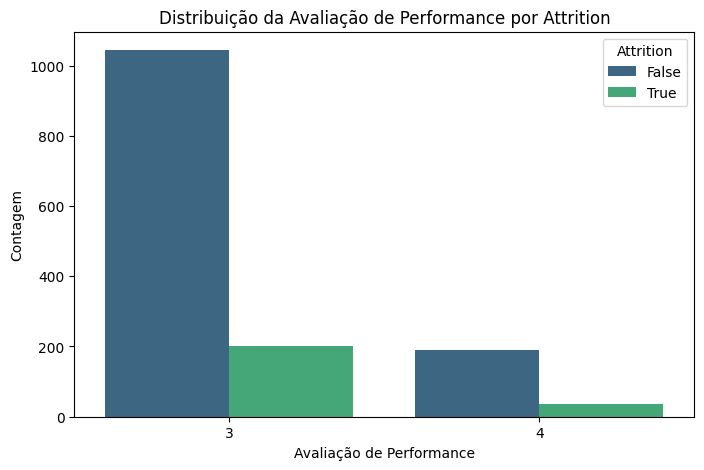

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_employee, x='PerformanceRating', hue='Attrition', palette='viridis')
plt.title('Distribuição da Avaliação de Performance por Attrition')
plt.xlabel('Avaliação de Performance')
plt.ylabel('Contagem')
plt.legend(title='Attrition')

### Satisfação de relacionamentos
A maior taxa de satisfação em relacionamentos está no grupo nível 3, com 31,22%, seguida de perto pelo nível 4, com 29,39%. A menor satisfação, de 18,78%, ocorre no grupo nível 1, que também apresenta a maior taxa de rotatividade, de 20,65%. As taxas de rotatividade dos grupos níveis 2 e 4 são bastante próximas, porém, curiosamente, o grupo nível 3 apresenta a maior rotatividade. Isso indica que as relações interpessoais influenciam o desligamento, mas não são o único fator determinante.

In [37]:
contagem_satisfacao_relacionamento = df_employee['RelationshipSatisfaction'].value_counts()
total_funcionarios = contagem_satisfacao_relacionamento.sum()
percentual_satisfacao_relacionamento = (contagem_satisfacao_relacionamento / total_funcionarios) * 100

tabela_satisfacao_relacionamento_attrition = pd.crosstab(
    df_employee['RelationshipSatisfaction'],
    df_employee['Attrition'],
    normalize='index') * 100

resumo_satisfacao_relacionamento = pd.DataFrame({
    'Percentual de Funcionários': percentual_satisfacao_relacionamento,
    'Taxa de Attrition (True)': tabela_satisfacao_relacionamento_attrition[True]
})

display(resumo_satisfacao_relacionamento.apply(lambda x: x.map('{:.2f}%'.format)))


,Percentual de Funcionários,Taxa de Attrition (True)
RelationshipSatisfaction,,
1,18.78%,20.65%
2,20.61%,14.85%
3,31.22%,15.47%
4,29.39%,14.81%


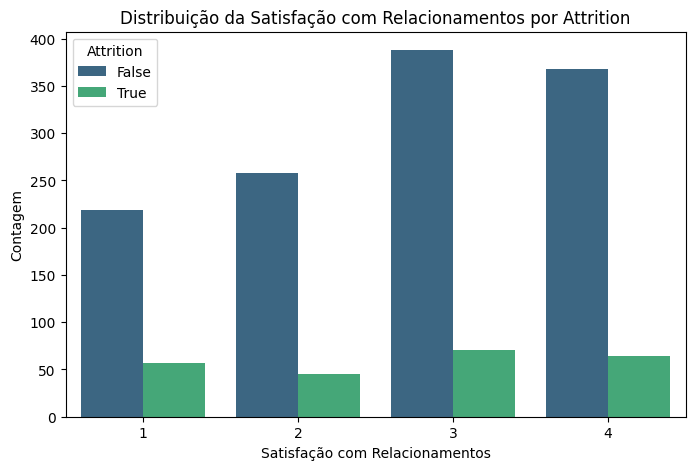

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_employee, x='RelationshipSatisfaction', hue='Attrition', palette='viridis')
plt.title('Distribuição da Satisfação com Relacionamentos por Attrition')
plt.xlabel('Satisfação com Relacionamentos')
plt.ylabel('Contagem')
plt.legend(title='Attrition')

### Worklife balance
A maioria dos funcionários acredita que possui um bom, porém não ideal, nível de equilíbrio entre vida pessoal e trabalho, representado pelo grupo nível 3, que corresponde a 60,75% dos colaboradores. Esse grupo também apresenta a menor taxa de evasão, de 14,22%.

O grupo com maior taxa de rotatividade é aquele que considera não ter equilíbrio algum, apesar de ser pequeno (apenas 5,44% dos funcionários), com uma taxa de saída expressiva de 31,25%.

O segundo maior grupo é o nível 2, que percebe algum equilíbrio, porém ainda insatisfatório, correspondendo a 23,40% dos funcionários. Curiosamente, esse grupo apresenta a segunda menor taxa de rotatividade, o que indica que mesmo entre aqueles que avaliam seu equilíbrio como “muito bom” (nível 4), a taxa de evasão é maior do que no nível 2.

In [39]:
contagem_worklife_balance = df_employee['WorkLifeBalance'].value_counts()
total_funcionarios = contagem_worklife_balance.sum()
percentual_worklife_balance = (contagem_worklife_balance / total_funcionarios) * 100

tabela_worklife_balance_attrition = pd.crosstab(
    df_employee['WorkLifeBalance'],
    df_employee['Attrition'],
    normalize='index') * 100

resumo_worklife_balance = pd.DataFrame({
    'Percentual de Funcionários': percentual_worklife_balance,
    'Taxa de Attrition (True)': tabela_worklife_balance_attrition[True]
})
display(resumo_worklife_balance.apply(lambda x: x.map('{:.2f}%'.format)))


,Percentual de Funcionários,Taxa de Attrition (True)
WorkLifeBalance,,
1,5.44%,31.25%
2,23.40%,16.86%
3,60.75%,14.22%
4,10.41%,17.65%


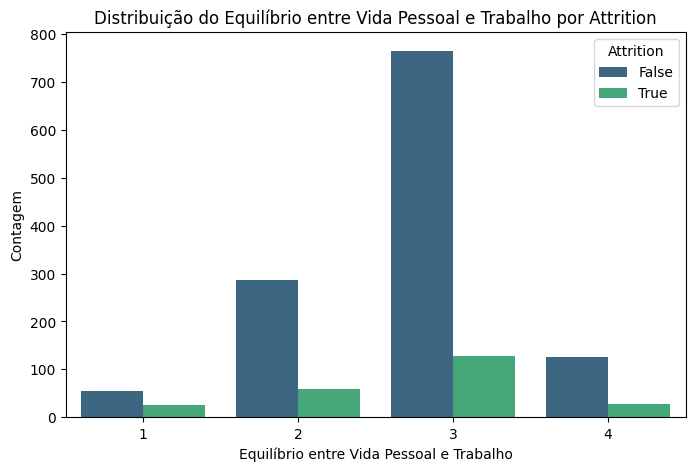

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_employee, x='WorkLifeBalance', hue='Attrition', palette='viridis')
plt.title('Distribuição do Equilíbrio entre Vida Pessoal e Trabalho por Attrition')
plt.xlabel('Equilíbrio entre Vida Pessoal e Trabalho')
plt.ylabel('Contagem')
plt.legend(title='Attrition')

### Anos desde a última promoção


In [41]:
contagem_anos_ultima_promocao = df_employee['YearsSinceLastPromotion'].value_counts()
total_funcionarios = contagem_anos_ultima_promocao.sum()
percentual_anos_ultima_promocao = (contagem_anos_ultima_promocao / total_funcionarios) * 100

tabela_anos_ultima_promocao_attrition = pd.crosstab(
    df_employee['YearsSinceLastPromotion'],
    df_employee['Attrition'],
    normalize='index') * 100

resumo_anos_ultima_promocao = pd.DataFrame({
    'Percentual de Funcionários': percentual_anos_ultima_promocao,
    'Taxa de Attrition (True)': tabela_anos_ultima_promocao_attrition[True]
})

display(resumo_anos_ultima_promocao.apply(lambda x: x.map('{:.2f}%'.format)))

linha_max_attrition = resumo_anos_ultima_promocao.loc[resumo_anos_ultima_promocao['Taxa de Attrition (True)'].idxmax()]

,Percentual de Funcionários,Taxa de Attrition (True)
YearsSinceLastPromotion,,
0,39.52%,18.93%
1,24.29%,13.73%
2,10.82%,16.98%
3,3.54%,17.31%
4,4.15%,8.20%
5,3.06%,4.44%
6,2.18%,18.75%
7,5.17%,21.05%
8,1.22%,0.00%


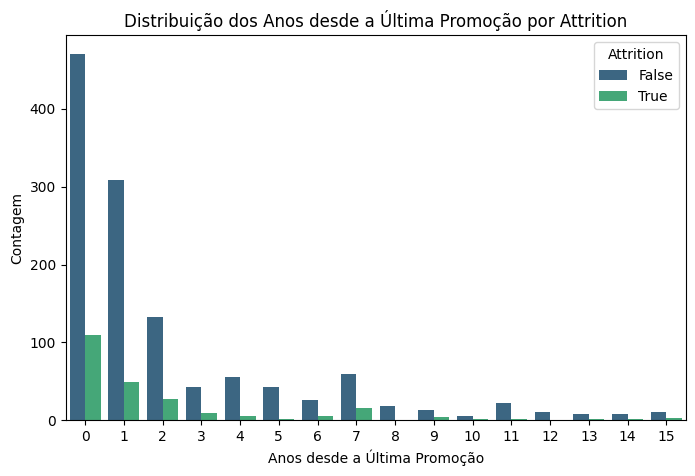

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_employee, x='YearsSinceLastPromotion', hue='Attrition', palette='viridis')
plt.title('Distribuição dos Anos desde a Última Promoção por Attrition')
plt.xlabel('Anos desde a Última Promoção')
plt.ylabel('Contagem')
plt.legend(title='Attrition')

Funcionários que não são promovidos há muitos anos apresentam maiores taxas de rotatividade, como os que estão há 9 (23,53%) e 15 anos (23,08%) sem promoção. Por outro lado, a taxa é menor entre aqueles promovidos no último ano (13,73%), mas ainda relativamente alta para promoções no ano atual (18,93%), o que pode indicar insatisfação mesmo após a promoção. Grupos com estabilidade prolongada, como 8 e 12 anos sem promoção, não apresentaram rotatividade, embora sejam poucos casos. A análise reforça que o tempo desde a última promoção influencia a saída de funcionários, mas não é o único fator determinante.

## Conclusão
A análise exploratória dos dados revelou padrões importantes relacionados à rotatividade (attrition) dos funcionários. Fatores como satisfação no trabalho, equilíbrio entre vida pessoal e profissional, e tempo desde a última promoção mostraram relação com a decisão de permanência ou saída da empresa. Observou-se que níveis mais baixos de satisfação e longos períodos sem promoção estão associados a maiores taxas de desligamento. Ainda assim, alguns grupos com estabilidade ou promoções recentes também apresentaram rotatividade, o que sugere que outros fatores complementares devem ser considerados.

### Características que influenciam na rotatividade
A rotatividade está ligada ao bem-estar, carreira e remuneração. Funcionários com baixa satisfação, falta de promoções, salários baixos e muitas horas extras têm maior tendência a sair. Além disso, muitos desligamentos ocorrem nos primeiros anos, reforçando a importância de uma boa integração e retenção inicial.

### Perfis com maiores riscos de rotatividade
Os colaboradores com maior risco de saída são aqueles com **baixa satisfação** geral, especialmente nas variáveis de JobSatisfaction, EnvironmentSatisfaction e WorkLifeBalance, com pontuações 1 ou 2. Outro perfil crítico é o de **funcionários que estão há muitos anos sem promoções** (A partir de 9 anos), a probabilidade de rotatividade aumenta. Também observamos que muitos **desligamentos ocorrem nos primeiros cinco anos de empresa**, sugerindo desafios no início da jornada. Por fim, **salários mais baixos e alta frequência de horas extras** (OverTime) também estão associados a um maior risco de saída.

### Ações a serem tomadas
Com base nos dados, a empresa pode reduzir a rotatividade investindo em equilíbrio entre vida profissional e pessoal, com políticas flexíveis e programas de bem-estar. Planos de carreira mais claros e ciclos de promoção mais frequentes são essenciais, especialmente para colaboradores antigos. Para novos contratados, ações de integração e acompanhamento nos primeiros anos ajudam na adaptação. Além disso, ajustes salariais e controle de horas extras podem diminuir a insatisfação e prevenir desligamentos.

# Ajuste de modelos

In [43]:
import numpy as np
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV,
    KFold, StratifiedKFold, RepeatedKFold,
    LeaveOneOut, cross_val_score, train_test_split
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

!pip install scikit-optimize -q
from skopt import BayesSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [44]:
x = df_padronizado.drop('Attrition', axis=1)
y = df_padronizado['Attrition']

# separa os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Over18,OverTime
1097,-1.415181,-1.121758,1.456975,-0.891688,0.0,0.874240,0.254625,-0.437503,-1.026167,-0.961486,...,0,0,0,0,0,0,0,0,1,0
727,-2.072192,-1.277942,-0.517332,-0.891688,0.0,-0.021377,-0.660531,0.349801,0.379672,-0.961486,...,0,0,0,1,0,0,0,1,1,0
254,-0.867672,1.101996,1.333581,-0.891688,0.0,-1.123037,1.169781,-1.027981,0.379672,-0.057788,...,0,0,0,0,1,0,0,0,1,0
1175,0.227347,-0.769726,0.346427,0.085049,0.0,1.045388,1.169781,0.005356,0.379672,-0.057788,...,0,1,0,0,0,0,1,0,1,0
1341,-0.648668,-1.218443,1.333581,0.085049,0.0,1.422577,-0.660531,1.137106,0.379672,-0.057788,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.210661,-0.130117,2.320735,0.085049,0.0,0.949013,-0.660531,-0.978775,1.785511,-0.057788,...,0,0,0,0,0,0,1,0,1,0
1294,0.446350,-0.881285,-0.517332,0.085049,0.0,1.311248,-0.660531,0.940280,1.785511,-0.057788,...,0,0,0,0,0,0,0,1,1,0
860,-1.634185,1.124308,-0.764121,1.061787,0.0,0.295994,0.254625,-0.880361,-1.026167,-0.961486,...,0,0,0,1,0,0,1,0,1,1
1459,-0.867672,1.426759,0.469821,-0.891688,0.0,1.708377,1.169781,-0.978775,-1.026167,-0.057788,...,0,0,0,0,0,0,1,0,1,1


In [46]:
y_train

,Attrition
1097,0
727,0
254,0
1175,0
1341,0
...,...
1130,0
1294,0
860,1
1459,0


# Modelo SVC

In [47]:
# os dados já foram padronizados antes

pipeline = Pipeline([
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

## Otimização de parâmetros

### Grid Search


In [48]:
# criar
grid_search = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)

# treina o modelo com validação cruzada
print('-------------- Iniciando grid Search -------------- ')
grid_search.fit(x_train, y_train)

# detalha os resultados em um DF
results = pd.DataFrame(grid_search.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]

print('resultados por combinação de parâmetros:')
for i, row in results.iterrows():
    print(f"{i+1}. Parâmetros: {row['params']}, Acurácia média: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")

# melhores parâmetros
print('\nMelhores parâmetros encontrados:')
print(grid_search.best_params_)

# avaliação final
final_score = grid_search.score(x_test, y_test)
print(f'\nAcurácia no conjunto de teste com melhores parâmetros: {final_score:.4f}')

-------------- Iniciando grid Search -------------- 
resultados por combinação de parâmetros:
1. Parâmetros: {'svc__C': 0.1, 'svc__kernel': 'linear'}, Acurácia média: 0.8742 (+/- 0.0166)
2. Parâmetros: {'svc__C': 0.1, 'svc__kernel': 'rbf'}, Acurácia média: 0.8316 (+/- 0.0020)
3. Parâmetros: {'svc__C': 0.2, 'svc__kernel': 'linear'}, Acurácia média: 0.8767 (+/- 0.0159)
4. Parâmetros: {'svc__C': 0.2, 'svc__kernel': 'rbf'}, Acurácia média: 0.8316 (+/- 0.0020)
5. Parâmetros: {'svc__C': 0.3, 'svc__kernel': 'linear'}, Acurácia média: 0.8759 (+/- 0.0183)
6. Parâmetros: {'svc__C': 0.3, 'svc__kernel': 'rbf'}, Acurácia média: 0.8316 (+/- 0.0020)
7. Parâmetros: {'svc__C': 0.4, 'svc__kernel': 'linear'}, Acurácia média: 0.8733 (+/- 0.0164)
8. Parâmetros: {'svc__C': 0.4, 'svc__kernel': 'rbf'}, Acurácia média: 0.8316 (+/- 0.0020)
9. Parâmetros: {'svc__C': 0.5, 'svc__kernel': 'linear'}, Acurácia média: 0.8716 (+/- 0.0172)
10. Parâmetros: {'svc__C': 0.5, 'svc__kernel': 'rbf'}, Acurácia média: 0.8325 (+/

### Random search

In [49]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    random_state=42,
    return_train_score=True
)

# treinar com validação cruzada
print('Iniciando Randomized Search')
random_search.fit(x_train, y_train)

results = pd.DataFrame(random_search.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]

print('Resultados por combinação testada:')
for i, row in results.iterrows():
    print(f"{i+1}. Parâmetros: {row['params']}, Acurácia média: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")

# melhor combo
print('\nMelhores parâmetros encontrados:')
print(random_search.best_params_)

# avaliação
final_score = random_search.score(x_test, y_test)
print(f'Acurácia no conjunto de teste com melhores parâmetros: {final_score:.4f}')

Iniciando Randomized Search
Resultados por combinação testada:
1. Parâmetros: {'svc__kernel': 'rbf', 'svc__C': 0.5}, Acurácia média: 0.8325 (+/- 0.0019)
2. Parâmetros: {'svc__kernel': 'rbf', 'svc__C': 1}, Acurácia média: 0.8529 (+/- 0.0129)
3. Parâmetros: {'svc__kernel': 'linear', 'svc__C': 0.1}, Acurácia média: 0.8742 (+/- 0.0166)
4. Parâmetros: {'svc__kernel': 'linear', 'svc__C': 10}, Acurácia média: 0.8682 (+/- 0.0170)
5. Parâmetros: {'svc__kernel': 'rbf', 'svc__C': 0.3}, Acurácia média: 0.8316 (+/- 0.0020)
6. Parâmetros: {'svc__kernel': 'linear', 'svc__C': 0.5}, Acurácia média: 0.8716 (+/- 0.0172)
7. Parâmetros: {'svc__kernel': 'linear', 'svc__C': 0.2}, Acurácia média: 0.8767 (+/- 0.0159)
8. Parâmetros: {'svc__kernel': 'rbf', 'svc__C': 0.1}, Acurácia média: 0.8316 (+/- 0.0020)
9. Parâmetros: {'svc__kernel': 'rbf', 'svc__C': 10}, Acurácia média: 0.8393 (+/- 0.0123)
10. Parâmetros: {'svc__kernel': 'linear', 'svc__C': 0.3}, Acurácia média: 0.8759 (+/- 0.0183)

Melhores parâmetros enco

### Bayesian optimization

In [50]:
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_grid,
    n_iter=10,
    cv=5,
    random_state=42,
    return_train_score=True
)

print('Iniciando Bayesian Optimization')
opt.fit(x_train, y_train)

results = pd.DataFrame(opt.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]

print('Resultados por iteração')
for i, row in results.iterrows():
    print(f"{i+1}. Parâmetros: {row['params']}, Acurácia média: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")

# melhor combo
print('\nMelhores parâmetros encontrados')
print(opt.best_params_)
print(f'Acurácia média com melhores parâmetros: {opt.best_score_:.4f}')

# avaliação
final_score = opt.score(x_test, y_test)
print(f'\nAcurácia no conjunto de teste com melhores parâmetros: {final_score:.4f}')

Iniciando Bayesian Optimization
Resultados por iteração
1. Parâmetros: OrderedDict([('svc__C', 0.3), ('svc__kernel', 'rbf')]), Acurácia média: 0.8316 (+/- 0.0020)
2. Parâmetros: OrderedDict([('svc__C', 1), ('svc__kernel', 'rbf')]), Acurácia média: 0.8529 (+/- 0.0129)
3. Parâmetros: OrderedDict([('svc__C', 0.4), ('svc__kernel', 'rbf')]), Acurácia média: 0.8316 (+/- 0.0020)
4. Parâmetros: OrderedDict([('svc__C', 1), ('svc__kernel', 'linear')]), Acurácia média: 0.8699 (+/- 0.0161)
5. Parâmetros: OrderedDict([('svc__C', 1), ('svc__kernel', 'linear')]), Acurácia média: 0.8699 (+/- 0.0161)
6. Parâmetros: OrderedDict([('svc__C', 1), ('svc__kernel', 'rbf')]), Acurácia média: 0.8529 (+/- 0.0129)
7. Parâmetros: OrderedDict([('svc__C', 0.5), ('svc__kernel', 'rbf')]), Acurácia média: 0.8325 (+/- 0.0019)
8. Parâmetros: OrderedDict([('svc__C', 0.4), ('svc__kernel', 'rbf')]), Acurácia média: 0.8316 (+/- 0.0020)
9. Parâmetros: OrderedDict([('svc__C', 10), ('svc__kernel', 'rbf')]), Acurácia média: 0.83

## Resultados por cada método
- Grid Search: 0.8878
- Random search: 0.8878
- Bayesian optimization: 0.8912 (**maior acurácia**)


## Cross validation

### K-fold

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores_kf = []

print('Iniciando  K-Fold')

for fold, (train_index, test_index) in enumerate(kf.split(x, y), start=1):
## usando iloc por ser um df
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    scores_kf.append(acc)


print(f'Acurácia média: {np.mean(scores_kf):.4f}')


Iniciando  K-Fold
Acurácia média: 0.8619


### Strafield K-fold

In [52]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores_skf = []

print('Iniciando Stratified K-Fold')

for fold, (train_index, test_index) in enumerate(skf.split(x, y), start=1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    scores_skf.append(acc)


print(f'Acurácia média: {np.mean(scores_skf):.4f}')

Iniciando Stratified K-Fold
Acurácia média: 0.8660


### Repeated k-fold

In [53]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)

scores_rkf = []

print('Iniciando Repeated K-Fold')

for fold, (train_index, test_index) in enumerate(rkf.split(x, y), start=1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    scores_rkf.append(acc)


print(f'Acurácia média: {np.mean(scores_rkf):.4f}')

Iniciando Repeated K-Fold
Acurácia média: 0.8660


## Acurácia média em cross validation
- K-fold: 0.8619
- Stratified K-fold: 0.8660 (**maior acurácia**)
- Repeated K-fold: 0.8660 (**maior acurácia**)

# Modelo RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

In [56]:
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10]
}

## Otimização de hiperparâmetros

### Grid Search

In [57]:
# criar
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, return_train_score=True)

# treina o modelo com validação cruzada
print('-------------- Iniciando grid Search -------------- ')
grid_search_rf.fit(x_train, y_train)

# detalha os resultados em um DF
results_rf = pd.DataFrame(grid_search_rf.cv_results_)
results_rf = results_rf[['params', 'mean_test_score', 'std_test_score']]

# melhores parâmetros
print('\nMelhores parâmetros encontrados:')
print(grid_search_rf.best_params_)

# avaliação final
final_score_rf = grid_search_rf.score(x_test, y_test)
print(f'\nAcurácia no conjunto de teste com melhores parâmetros: {final_score_rf:.4f}')

-------------- Iniciando grid Search -------------- 

Melhores parâmetros encontrados:
{'rf__max_depth': None, 'rf__n_estimators': 200}

Acurácia no conjunto de teste com melhores parâmetros: 0.8503


### Random search

In [58]:
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    random_state=42,
    return_train_score=True
)

# treinar com validação cruzada
print('Iniciando Randomized Search')
random_search_rf.fit(x_train, y_train)

results_rf = pd.DataFrame(random_search.cv_results_)
results_rf = results_rf[['params', 'mean_test_score', 'std_test_score']]


# melhor combo
print('\nMelhores parâmetros encontrados:')
print(random_search_rf.best_params_)

# avaliação
final_score_rf = random_search_rf.score(x_test, y_test)
print(f'Acurácia no conjunto de teste com melhores parâmetros: {final_score_rf:.4f}')

Iniciando Randomized Search


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Melhores parâmetros encontrados:
{'rf__n_estimators': 200, 'rf__max_depth': None}
Acurácia no conjunto de teste com melhores parâmetros: 0.8503


### Bayesian optimization

In [59]:
opt_rf = BayesSearchCV(
    estimator=pipeline_rf,
    search_spaces=param_grid_rf,
    n_iter=10,
    cv=5,
    random_state=42,
    return_train_score=True
)

print('Iniciando Bayesian Optimization')
opt_rf.fit(x_train, y_train)

results_rf = pd.DataFrame(opt.cv_results_)
results_rf = results_rf[['params', 'mean_test_score', 'std_test_score']]


# melhor combo
print('\nMelhores parâmetros encontrados')
print(opt_rf.best_params_)
print(f'Acurácia média com melhores parâmetros: {opt_rf.best_score_:.4f}')

# avaliação
final_score_rf = opt_rf.score(x_test, y_test)
print(f'\nAcurácia no conjunto de teste com melhores parâmetros: {final_score_rf:.4f}')

Iniciando Bayesian Optimization


/usr/local/lib/python3.11/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [100, 200] was inferred to Integer(low=100, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(100, 200), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [100, 200] was inferred to Integer(low=100, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(100, 200), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [100, 200] was inferred to Integer(low=100, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, 


Melhores parâmetros encontrados
OrderedDict([('rf__max_depth', None), ('rf__n_estimators', 182)])
Acurácia média com melhores parâmetros: 0.8609

Acurácia no conjunto de teste com melhores parâmetros: 0.8435


## Resultados por cada método
- Grid Search: 0.8503 (**maior acurácia**)
- Random search: 0.8503 (**maior acurácia**)
- Bayesian optimization:  0.8435  

## Cross-validation

### K-fold

In [60]:
kf_rf = KFold(n_splits=5, shuffle=True, random_state=42)

scores_kf_rf = []

print('Iniciando K-Fold')

for fold, (train_index, test_index) in enumerate(kf_rf.split(x, y), start=1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    pipeline_rf.fit(x_train, y_train)
    y_pred = pipeline_rf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    scores_kf_rf.append(acc)

print(f'\nAcurácia média (K-Fold): {np.mean(scores_kf_rf):.4f}')

Iniciando K-Fold

Acurácia média (K-Fold): 0.8544


### Stratified k-fold


In [61]:
skf_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores_skf_rf = []

print('Iniciando Stratified K-Fold')

for fold, (train_index, test_index) in enumerate(skf_rf.split(x, y), start=1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline_rf.fit(x_train, y_train)
    y_pred_rf = pipeline_rf.predict(x_test)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    scores_skf_rf.append(acc_rf)


print(f'Acurácia média: {np.mean(scores_skf_rf):.4f}')

Iniciando Stratified K-Fold
Acurácia média: 0.8531


### Repeated K-fold:

In [62]:
rkf_rf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)

scores_rkf_rf = []

print('Iniciando Repeated K-Fold')

for fold, (train_index, test_index) in enumerate(rkf_rf.split(x, y), start=1):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline_rf.fit(x_train, y_train)
    y_pred_rf = pipeline_rf.predict(x_test)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    scores_rkf_rf.append(acc_rf)


print(f'Acurácia média: {np.mean(scores_rkf_rf):.4f}')

Iniciando Repeated K-Fold
Acurácia média: 0.8571


## Acurácia média em cross validation
- K-fold: 0.8544
- Stratified K-fold: 0.8531
- Repeated K-fold: 0.8571 (**maior acurácia**)

# Comparando os modelos

Os modelos SVC e Random Forest apresentaram desempenhos semelhantes na tarefa de prever a rotatividade dos funcionários. O SVC mostrou uma leve vantagem na acurácia média durante a validação cruzada, indicando maior consistência na generalização dos dados de treino. Já no conjunto de teste, ambos os modelos tiveram resultados próximos, demonstrando boa capacidade preditiva.

In [63]:
print(f'SVC Otimizado (Stratified K-Fold): Acurácia Média = {np.mean(scores_skf):.4f}')
print(f'Random Forest Otimizado (Stratified K-Fold): Acurácia Média = {np.mean(scores_skf_rf):.4f}')

print('\nAcurácia no Conjunto de Teste:')
print(f'SVC Otimizado: Acurácia = {final_score:.4f}')
print(f'Random Forest Otimizado: Acurácia = {final_score_rf:.4f}')

print('\nComparação entre os Modelos:')
if np.mean(scores_skf) > np.mean(scores_skf_rf):
    print('Com base na acurácia média da validação cruzada, o SVC Otimizado teve um desempenho ligeiramente melhor.')
elif np.mean(scores_skf) < np.mean(scores_skf_rf):
    print('Com base na acurácia média da validação cruzada, o Random Forest Otimizado teve um desempenho ligeiramente melhor.')
else:
    print('Com base na acurácia média da validação cruzada, ambos os modelos tiveram desempenho semelhante.')

if final_score > final_score_rf:
    print('Com base na acurácia do conjunto de teste, o SVC Otimizado teve um desempenho melhor.')
elif final_score < final_score_rf:
    print('Com base na acurácia do conjunto de teste, o Random Forest Otimizado teve um desempenho melhor.')
else:
    print('Com base na acurácia do conjunto de teste, ambos os modelos tiveram desempenho semelhante.')


SVC Otimizado (Stratified K-Fold): Acurácia Média = 0.8660
Random Forest Otimizado (Stratified K-Fold): Acurácia Média = 0.8531

Acurácia no Conjunto de Teste:
SVC Otimizado: Acurácia = 0.8912
Random Forest Otimizado: Acurácia = 0.8435

Comparação entre os Modelos:
Com base na acurácia média da validação cruzada, o SVC Otimizado teve um desempenho ligeiramente melhor.
Com base na acurácia do conjunto de teste, o SVC Otimizado teve um desempenho melhor.


# Utilização do modelo na prática

Observação: Esta é apenas uma demonstração de uso dos modelos treinados na prática.
Os valores usados para simular o novo funcionário foram inventados e não fazem parte dos testes oficiais.
O objetivo é mostrar como o modelo recebe dados e retorna uma previsão sobre a probabilidade de um funcionário sair ou permanecer.

In [64]:
# dados inventados gerados pelo gemini
novo_dado_nao_padronizado = pd.DataFrame({
    'Age': [23],
    'DailyRate': [800],
    'DistanceFromHome': [5],
    'Education': [3],
    'EmployeeCount': [1],
    'EmployeeNumber': [2070],
    'EnvironmentSatisfaction': [4],
    'HourlyRate': [70],
    'JobInvolvement': [3],
    'JobLevel': [1],
    'JobSatisfaction': [4],
    'MonthlyIncome': [4000],
    'MonthlyRate': [6000],
    'NumCompaniesWorked': [1],
    'PercentSalaryHike': [12],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [4],
    'StandardHours': [80],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [3],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [3],
    'YearsInCurrentRole': [2],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [2],
    'BusinessTravel': ['Travel_Rarely'],
    'Department': ['Research & Development'],
    'EducationField': ['Life Sciences'],
    'Gender': ['Female'],
    'JobRole': ['Research Scientist'],
    'MaritalStatus': ['Single'],
    'Over18': ['Y'],
    'OverTime': ['No']
})


# convertendo as colunas
bool_mapping = {'Y': 1, 'N': 0, 'Yes': 1, 'No': 0}
bool_cols_to_convert = ['Over18', 'OverTime']
for col in bool_cols_to_convert:
    if col in novo_dado_nao_padronizado.columns and novo_dado_nao_padronizado[col].dtype == 'object':
        novo_dado_nao_padronizado[col] = novo_dado_nao_padronizado[col].map(bool_mapping).fillna(novo_dado_nao_padronizado[col]).astype(int)


# encoding e padronizacao
categorical_cols_for_encoding = novo_dado_nao_padronizado.select_dtypes(include='object').columns
novo_dado_categorico_encoded = pd.get_dummies(novo_dado_nao_padronizado[categorical_cols_for_encoding], drop_first=True, dtype=int)

numerical_cols_novo_dado = novo_dado_nao_padronizado.select_dtypes(include=np.number).columns



if 'scaler' in globals():

    numerical_cols_for_scaler = colunas_numericas_capping.tolist()
    novo_dado_numerical_filtered = novo_dado_nao_padronizado[numerical_cols_for_scaler]

    novo_dado_padronizado_numerical = scaler.transform(novo_dado_numerical_filtered)
    novo_dado_padronizado_numerical = pd.DataFrame(novo_dado_padronizado_numerical, columns=numerical_cols_for_scaler, index=novo_dado_nao_padronizado.index)
else:
    print("Erro: O objeto 'scaler' não foi encontrado. Certifique-se de que a célula de padronização foi executada.")
    raise NameError("O objeto 'scaler' não está disponível. Não é possível padronizar os novos dados.")




novo_dado_final = pd.concat([novo_dado_padronizado_numerical, novo_dado_categorico_encoded], axis=1)


missing_cols = set(x.columns) - set(novo_dado_final.columns)
for c in missing_cols:
    novo_dado_final[c] = 0
novo_dado_final = novo_dado_final[x.columns]


# previsão com SVC
svc_model_for_prediction = None
if 'opt' in locals():
    svc_model_for_prediction = opt.best_estimator_
    print('\nUsando o modelo SVC da Otimização Bayesiana para previsão.')
elif 'grid_search' in locals():
    svc_model_for_prediction = grid_search.best_estimator_
    print('\nUsando o modelo SVC do Grid Search para previsão.')
elif 'random_search' in locals():
    svc_model_for_prediction = random_search.best_estimator_
    print('\nUsando o modelo SVC do Random Search para previsão.')
else:
    print('\nNenhum modelo SVC otimizado foi encontrado.')

if svc_model_for_prediction is not None:
    prediction_svc = svc_model_for_prediction.predict(novo_dado_final)
    print(f'Predição SVC: {"Sairá" if prediction_svc[0] == 1 else "Ficará"}')
else:
    print('Não é possível fazer a previsão com SVC, pois nenhum modelo otimizado foi encontrado.')

# previsão com Random Forest
rf_model_for_prediction = None
if 'grid_search_rf' in locals():
    rf_model_for_prediction = grid_search_rf.best_estimator_
    print('\nUsando o modelo Random Forest do Grid Search para previsão.')
elif 'random_search_rf' in locals():
    rf_model_for_prediction = random_search_rf.best_estimator_
    print('\nUsando o modelo Random Forest do Random Search para previsão.')
elif 'opt_rf' in locals():
    rf_model_for_prediction = opt_rf.best_estimator_
    print('\nUsando o modelo Random Forest da Otimização Bayesiana para previsão.')
else:
    print('\nNenhum modelo Random Forest otimizado foi encontrado.')

if rf_model_for_prediction is not None:
    prediction_rf = rf_model_for_prediction.predict(novo_dado_final)
    print(f'Predição Random Forest: {"Sairá" if prediction_rf[0] == 1 else "Ficará"}')
else:
    print('Não é possível fazer a previsão com Random Forest, pois nenhum modelo otimizado foi encontrado.')


Usando o modelo SVC da Otimização Bayesiana para previsão.
Predição SVC: Ficará

Usando o modelo Random Forest do Grid Search para previsão.
Predição Random Forest: Ficará


In [65]:
import joblib
joblib.dump(opt.best_estimator_, 'modelo_svc.pkl')
joblib.dump(grid_search_rf.best_estimator_, 'modelo_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [66]:
# Filter the DataFrame to include only employees who left (Attrition is True)
df_left = df_employee[df_employee['Attrition'] == True]

# Count the number of employees who left in each age group
attrition_by_age_group = df_left['AgeGroup'].value_counts()

# Calculate the total number of employees who left
total_left = df_left.shape[0]

# Calculate the percentage of employees who left within the specified age groups
percentage_18_24 = (attrition_by_age_group.get('18-24', 0) / total_left) * 100
percentage_25_34 = (attrition_by_age_group.get('25-34', 0) / total_left) * 100

print(f"Percentual de funcionários que saíram com idade entre 18-24 anos: {percentage_18_24:.2f}%")
print(f"Percentual de funcionários que saíram com idade entre 25-34 anos: {percentage_25_34:.2f}%")

# You can also display the counts and percentages for all age groups who left:
print("\nDistribuição de funcionários que saíram por faixa etária:")
attrition_by_age_group_percentage = (attrition_by_age_group / total_left) * 100
display(attrition_by_age_group_percentage.apply(lambda x: f'{x:.2f}%').to_frame(name='% of Employees Who Left'))

Percentual de funcionários que saíram com idade entre 18-24 anos: 16.03%
Percentual de funcionários que saíram com idade entre 25-34 anos: 47.26%

Distribuição de funcionários que saíram por faixa etária:


,% of Employees Who Left
AgeGroup,
25-34,47.26%
35-44,21.52%
18-24,16.03%
45-54,10.55%
55-64,4.64%


In [67]:
# Calculate the total number of employees
total_employees = df_employee.shape[0]

# Count the number of employees for each level of EnvironmentSatisfaction
satisfaction_counts = df_employee['EnvironmentSatisfaction'].value_counts().sort_index()

# Calculate the percentage for each level
satisfaction_percentages = (satisfaction_counts / total_employees) * 100

# Create a DataFrame for better display
satisfaction_table = pd.DataFrame({
    'Quantidade de Funcionários': satisfaction_counts,
    'Percentual': satisfaction_percentages.map('{:.2f}%'.format)
})

print("Distribuição de funcionários por nível de EnvironmentSatisfaction:")
display(satisfaction_table)

Distribuição de funcionários por nível de EnvironmentSatisfaction:


,Quantidade de Funcionários,Percentual
EnvironmentSatisfaction,,
1,284,19.32%
2,287,19.52%
3,453,30.82%
4,446,30.34%


In [68]:
# Calculate the total number of employees
total_employees = df_employee.shape[0]

# Count the number of employees for each level of JobSatisfaction
jobsatisfaction_counts = df_employee['JobSatisfaction'].value_counts().sort_index()

# Calculate the percentage for each level
jobsatisfaction_percentages = (jobsatisfaction_counts / total_employees) * 100

# Create a DataFrame for better display
jobsatisfaction_table = pd.DataFrame({
    'Quantidade de Funcionários': jobsatisfaction_counts,
    'Percentual': jobsatisfaction_percentages.map('{:.2f}%'.format)
})

print("Distribuição de funcionários por nível de JobSatisfaction:")
display(jobsatisfaction_table)

Distribuição de funcionários por nível de JobSatisfaction:


,Quantidade de Funcionários,Percentual
JobSatisfaction,,
1,289,19.66%
2,280,19.05%
3,442,30.07%
4,459,31.22%


In [69]:
# Calculate the total number of employees
total_employees = df_employee.shape[0]

# Count the number of employees for each level of WorkLifeBalance
worklife_counts = df_employee['WorkLifeBalance'].value_counts().sort_index()

# Calculate the percentage for each level
worklife_percentages = (worklife_counts / total_employees) * 100

# Create a DataFrame for better display
worklife_table = pd.DataFrame({
    'Quantidade de Funcionários': worklife_counts,
    'Percentual': worklife_percentages.map('{:.2f}%'.format)
})

print("Distribuição de funcionários por nível de WorkLifeBalance:")
display(worklife_table)

Distribuição de funcionários por nível de WorkLifeBalance:


,Quantidade de Funcionários,Percentual
WorkLifeBalance,,
1,80,5.44%
2,344,23.40%
3,893,60.75%
4,153,10.41%


In [70]:
# Calculate the total number of employees
total_employees = df_employee.shape[0]

# Count the number of employees for each level of RelationshipSatisfaction
relationship_counts = df_employee['RelationshipSatisfaction'].value_counts().sort_index()

# Calculate the percentage for each level
relationship_percentages = (relationship_counts / total_employees) * 100

# Create a DataFrame for better display
relationship_table = pd.DataFrame({
    'Quantidade de Funcionários': relationship_counts,
    'Percentual': relationship_percentages.map('{:.2f}%'.format)
})

print("Distribuição de funcionários por nível de RelationshipSatisfaction:")
display(relationship_table)

Distribuição de funcionários por nível de RelationshipSatisfaction:


,Quantidade de Funcionários,Percentual
RelationshipSatisfaction,,
1,276,18.78%
2,303,20.61%
3,459,31.22%
4,432,29.39%


Distribuição de funcionários por StockOptionLevel (Percentual do Total):


,Quantidade de Funcionários,Percentual do Total
StockOptionLevel,,
0,631,42.93%
1,596,40.54%
2,158,10.75%
3,85,5.78%



Taxa de Attrition por StockOptionLevel (Percentual dentro de cada nível):


Attrition,False,True
StockOptionLevel,,
0,75.59%,24.41%
1,90.60%,9.40%
2,92.41%,7.59%
3,82.35%,17.65%


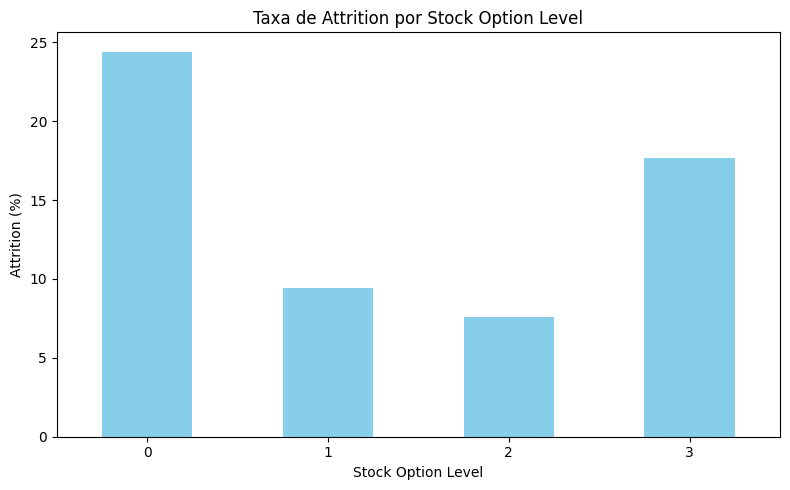

In [71]:
# Calculate the total number of employees
total_employees = df_employee.shape[0]

# Calculate the count of employees for each StockOptionLevel
stock_option_counts = df_employee['StockOptionLevel'].value_counts().sort_index()

# Calculate the percentage of all employees for each StockOptionLevel
stock_option_percentages = (stock_option_counts / total_employees) * 100

# Create a DataFrame for better display of the overall distribution
stock_option_distribution_table = pd.DataFrame({
    'Quantidade de Funcionários': stock_option_counts,
    'Percentual do Total': stock_option_percentages.map('{:.2f}%'.format)
})

print("Distribuição de funcionários por StockOptionLevel (Percentual do Total):")
display(stock_option_distribution_table)

# Calculate the cross-tabulation of StockOptionLevel and Attrition, normalized by row
stock_attrition_crosstab = pd.crosstab(df_employee['StockOptionLevel'], df_employee['Attrition'], normalize='index') * 100

# Display the percentage table (Attrition Rate within each level)
print("\nTaxa de Attrition por StockOptionLevel (Percentual dentro de cada nível):")
display(stock_attrition_crosstab.apply(lambda x: x.map('{:.2f}%'.format)))

# Create a bar plot showing Attrition Rate within each level
stock_attrition_crosstab[True].plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Taxa de Attrition por Stock Option Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Attrition (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Com base na tabela e no gráfico de barras que mostram a relação entre o nível de opções de ações (StockOptionLevel) e a rotatividade (Attrition), podemos observar que funcionários com nível 0 têm a maior taxa de rotatividade, de 24,41%. À medida que o nível de opções de ações aumenta para 1 e 2, a taxa de rotatividade cai significativamente para 9,40% e 7,59%, respectivamente, sugerindo que possuir algum nível de opções de ações está associado a uma menor probabilidade de deixar a empresa. No entanto, a taxa de rotatividade volta a subir para 17,65% entre os funcionários com nível 3, indicando que, embora opções de ações estejam ligadas a menor rotatividade, o nível mais alto não necessariamente corresponde à menor taxa de desligamento.
